# Catapult Optimization
**Name:** Nathan Constantine

## Overview

In this report, I dive into the set up of a rudimentary catapult, and attempt to optimize the set-up to deliver a maximum impulse on an imaginary castle wall.

**Research Question: *How can we optimize a projectile to maximize impact force without hindering an army?***

### The Catapult Design

The catapult is built around a pivot. On this pivot, we place a rigid throwing arm. On one end we place our projectile. On the other end, opposite the pivot with respect to the projectile, we place the counterweight. It will be the falling of this counterweight which provides the kinetic energy required to launch the projectile. 

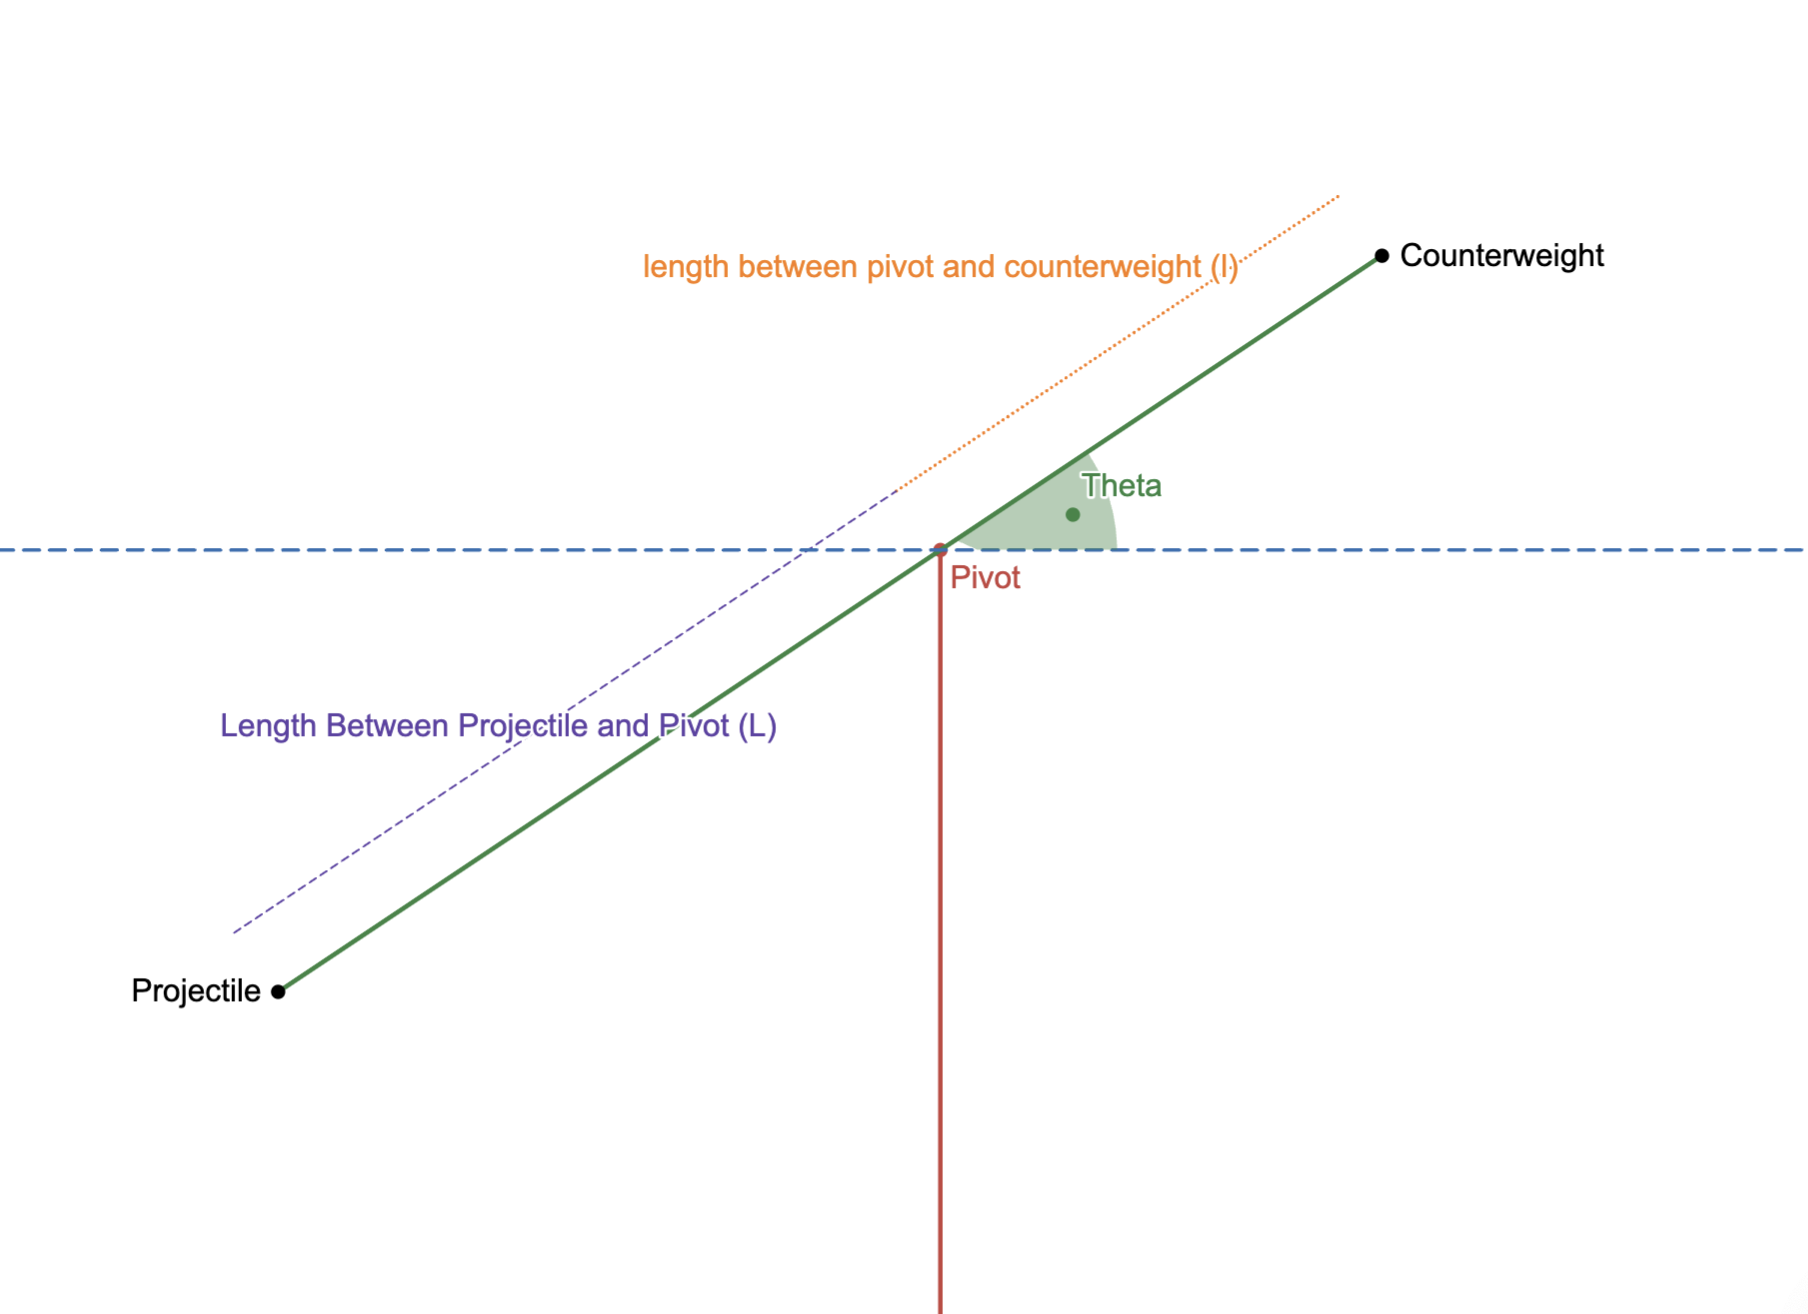

**Fig 1. The set up for the catapult before the launch arm is released. The Pivot is shown in red; the throwing arm is in green. The purple length (L), is the length from the pivot to the projectile. The orange length (l), is the length from the pivot to the counterweight. Theta can be seen to be the angle between the orange length (l) and the horizontal in blue.**

Above, you can see a diagram of the initial setup, before the arm is released. Note that $\theta$ is defined to be the angle between the horizontal and the counterweight, with respect to the pivot. $L$ is the distance between the pivot and the projectile; $l$ is the distance between the pivot and the counterweight. Thus,

$$\text{Total Arm Length}=L+l$$

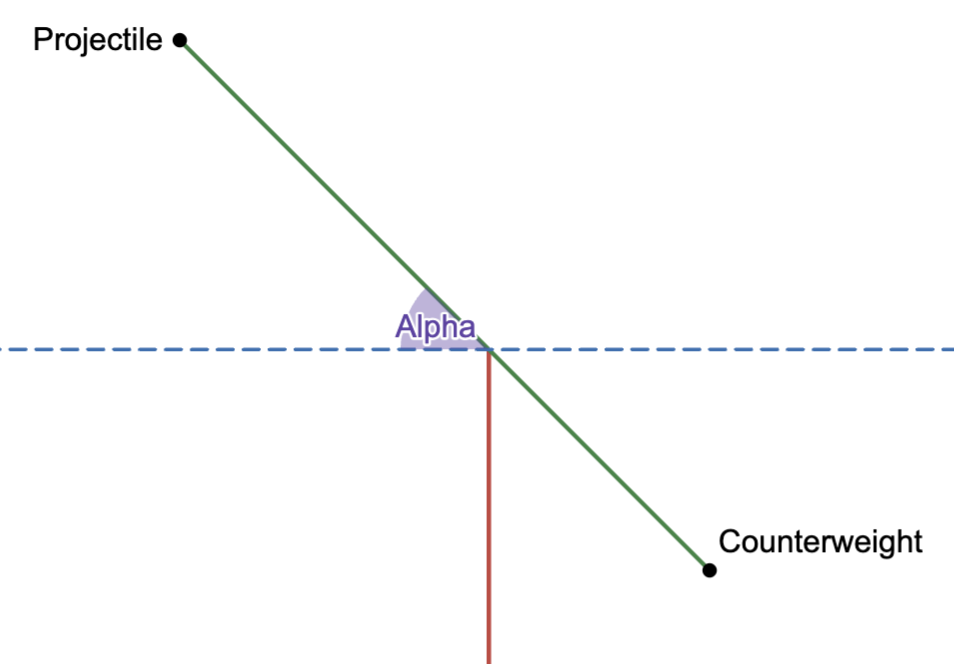

**Fig 2. The catapult at the instant of the projectile launch. The Pivot is shown in red; the throwing arm is in green. Alpha can be seen to be the angle between the projectile and the horizontal in blue.**

Next, the catapult swing clockwise. Above, you can see a diagram of the catapult at the moment of launch. Note that the dimensions of the throwing arm and the location of the pivot do not change. Also note that $\alpha$ is defined to be the angle between the projectile and the horizontal, with respect to the pivot. Thus we can conclude that the counterweight swings through a total angle of:

$$\text{Total Angle Swept}=\theta+\alpha$$

### Assumptions for the Catapult

I am assuming that the catapult has been built by some magical engineer, such that there is no friction between the arm and the frame, at the pivot point. 

I am also assuming the arm is perfectly strong, and will not deform or break under the stresses. 

To simplify the math, I am assuming a massless throwing arm. 

### Setting up the Wall

Through my research, it became clear that the strength of a castle wall is dependent on many factors, such as stone type, architecture, and impact angle. Thus, for this simulation, I have elected to assume the wall will not break or deform, regardless of the impact force. 

The reasoning for this decision is twofold. 

For one, it would be very difficult to find to construct an estimate for the strength of the wall (*for the reasons above*) and there is little research regarding the critical impulse to collapse a castle wall. Much of the research I can find where people are modeling the strength of castle walls is focused on restoration, not destruction.

Secondly, if I was a medieval military leader testing catapult designs, I would care less about a catapults' ability to destroy a specific wall. It would be more prudent to design a catapult that maximizes the force delivered given a distance to a target.

### The Rebound

There are two things I will be doing to add complexity to the simulation. First, I will be considering a partially elastic collision between the projectile and the wall, such that the wall **absorbs twenty percent of the kinetic energy** of the projectile. The impact angle should be equal but opposite to the exit angle post impact. I have included a diagram

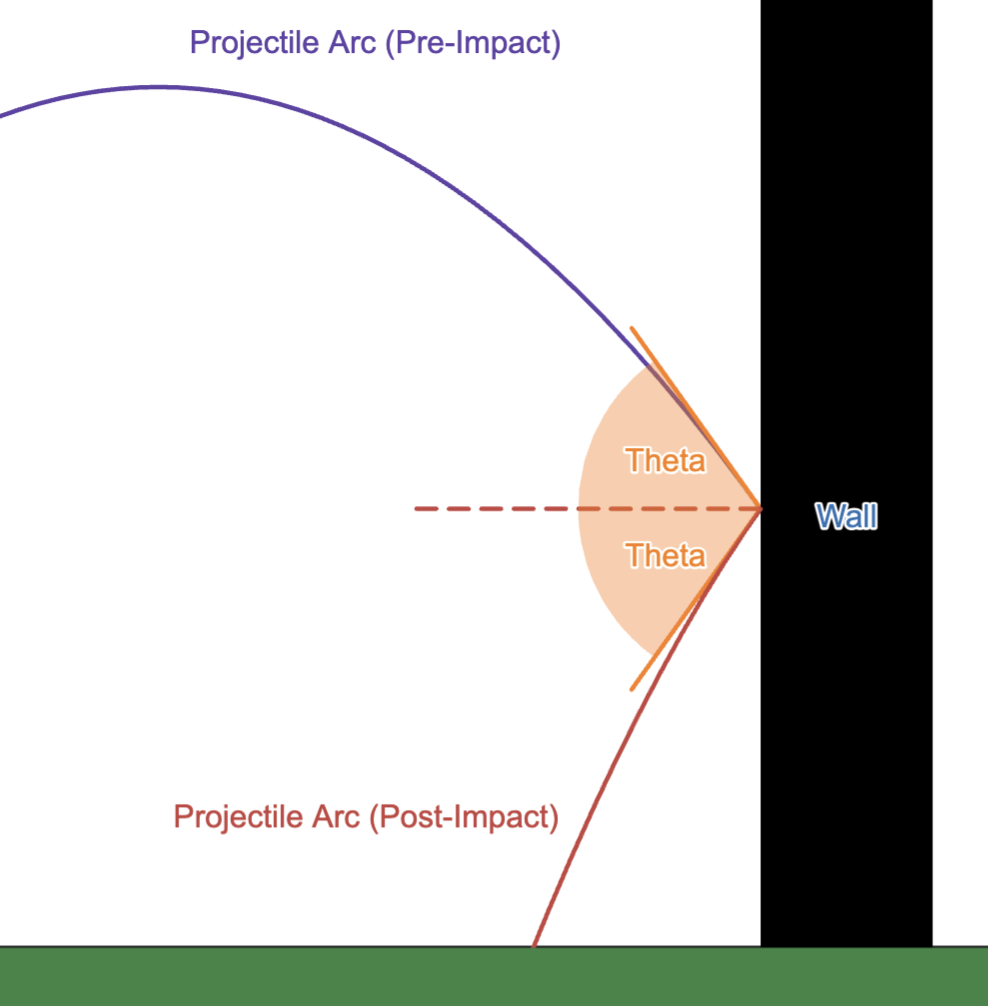

**Fig 3. The expected post impact trajectory. The incident and reflected angles must be the same.**

### Our Army

But what are we going to do with that information? 

I am going to imagine that the warlord which controls the catapult has set up his army such that they are 15 meters away from the wall, with the wall 30 meters from the catapult. Below, I have included a diagram showing the position of the army, and a fail case where the projectile has hit the army. Soldiers are squishier than a wall, and would definitely not appreciate being hit by a boulder. So, it will be important for the siege that the boulder hits with energy/direction such that it does not rebound on to the army. 

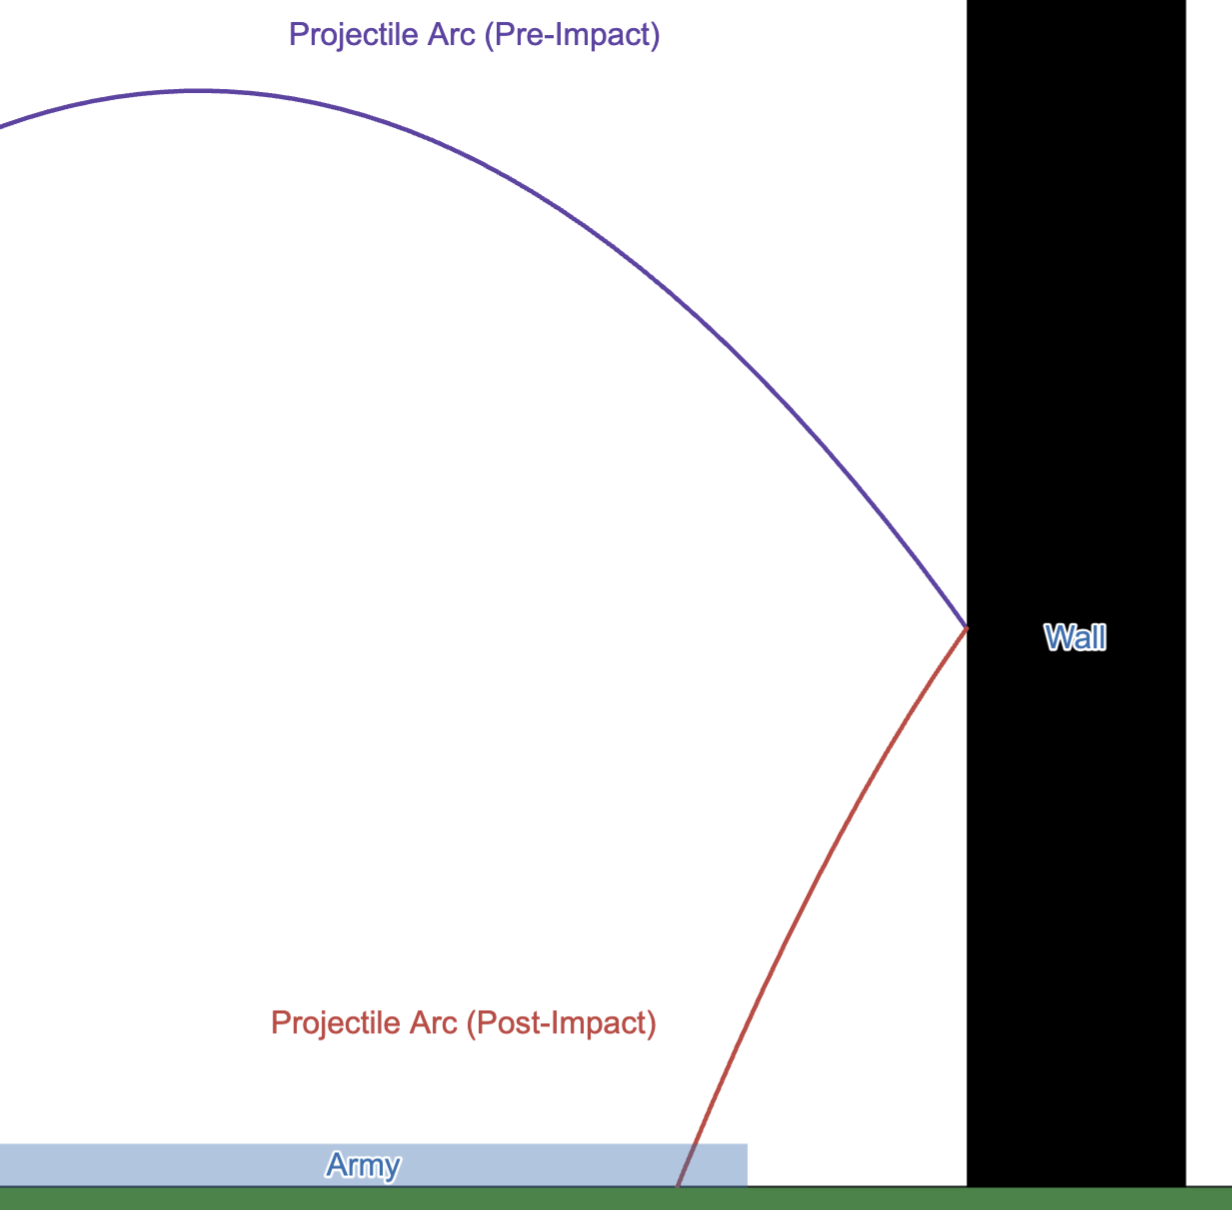

**Fig 4. The position of an army, in a situation where the soldiers have been hit by the rebounding projectile.**

### Projectile strength

I will be assuming the projectile is a uniform limestone sphere of radius $r$. A study from the University of Colorado [1] found the average tensile strength of limestone is 36.28 $\pm$ 1.24 MPa. Thus we have
$$P=\frac{F}{A}\implies F_{max}=P_{max}A_{impact}=(36.28\times10^{6}\:Pa)(\frac{1}{2}4\pi r^2)=(2.4052\times10^8\:Pa)\cdot r^2$$

If the boulder shatters on impact, it could leave the ground at front of the wall littered with fragments of stone. This could trip up the soldiers as them storm the wall, so the boulder must not shatter on impact.

### Summary of The Goal

I want to optimize the projectile parameters such that we can deliver a maximal impact force without having the projectile (a) shatter, (b) fail to hit the wall, or (c) rebound and hit the army.

## Building the Simulation

I have chosen to set up the code with a series of functions. I will go through each, explaining the reasoning. Under each function, there will be an explanation of the physics behind the code. 

In [1]:
import numpy as np

def delta_k(theta, alpha, l, L, M_c, M_p, g=9.81):
    """
    Compute the change in potential energy of counterweight + projectile
    as the arm rotates rigidly from initial counterweight angle theta
    to final projectile angle alpha (both in radians).
    """
    # Initial and final counterweight heights
    hC_initial = l * np.sin(theta)
    hC_final   = -l * np.sin(alpha)

    # Initial and final projectile heights (opposite side of pivot)
    hP_initial = -L * np.sin(theta)  # when counterweight at theta_d
    hP_final   = L * np.sin(alpha)   # when projectile at alpha_d

    # Potential energies
    U_initial = M_c * g * hC_initial + M_p * g * hP_initial
    U_final   = M_c * g * hC_final   + M_p * g * hP_final

    delta_U = U_final - U_initial
    delta_K = -delta_U   # delta_K = -delta_U

    return delta_K if delta_K > 0 else None

This function computes the change in kinetic energy of the system. We start be defining the final and initial heights of the counterweight. Using triangles, assuming the origin is at the pivot, we can show that:

$$h_{C,i}=l\sin(\theta)\quad\text{and}\quad h_{C,f}=-l\sin(\alpha)$$

For the projectile, we can do the reverse and show the following. Note the sign change, as the projectile is opposite the counterweight.

$$h_{P,i}=-L\sin(\theta)\quad\text{and}\quad h_{P,f}=L\sin(\alpha)$$

Next, we say that the potential energy of a state is given by the sum of the potential energies of the components:

$$U_{net}=\sum U=U_P+U_C$$

Gravitation potential energy is defined to be:

$$U_g=mgh$$

Thus we can plug in to solve for the initial potential energy of the system.

$$U_{net,i}=m_Cgh_{C,i}+m_Pgh_{P,i}=m_Cgl\sin(\theta)-m_PgL\sin(\theta)$$

And for the final state (*at the time of launch*):

$$U_{net,f}=m_Cgh_{C,f}+m_Pgh_{P,f}=-m_Cgl\sin(\alpha)+m_PgL\sin(\alpha)$$

We can then compute the change in potential energy.

$$\Delta U_{net}=U_{net,f}-U_{net,i}$$

Finally, by the conservation of energy:

$$\Delta K +\Delta U=0\implies\Delta K = -\Delta U$$

In [2]:
def speed(del_k, M_p):
    """
    Compute projectile speed in the ideal case where the arm
    comes to a complete stop at alpha and all energy ΔK is
    perfectly transferred to the projectile.
    """
    return np.sqrt((2.0 * del_k) / M_p)

We have already found the kinetic energy released into the system as the counterweight falls. Assuming an ideal case where the swing arm stops completely and all of the energy is transfered to the projectile, we have
$$\Delta K=\frac{1}{2}m_Pv^2$$
Solving for the speed, $v$, we have
$$v=\sqrt{\frac{2\Delta K}{m_P}}$$

In [3]:
def velocity_perp_to_arm(v, alpha):
    """
    Velocity is perpendicular to the arm at angle alpha_d.
    Arm angle = alpha_d, so tangent direction = alpha_d - 90° (clockwise).
    """
    angle = alpha - np.pi/2

    vx= v * np.cos(angle)
    vy= v * np.sin(angle)
    
    return vx, vy

We have found the speed of the projectile at the time of launch, but this is not sufficient to begin our Euler's method simulation. We need to find the horizontal and vertical components of the velocity. 

The release angle is 90 degrees clockwise from alpha, so we start by accounting for that. Then we can compute the components using trigonometry. 

In [4]:
def impact_force(M_p, vx, vy, r):
    f = 0.5 * M_p * (vx**2 + vy**2) / r

    if f >= 2.4052* (10**8) * (r**2): # projectile shatters
        return None
    else:
        return f

Force is calculated as follows:

$$F=\frac{\Delta E}{\text{stopping distance}}=\frac{\frac{1}{2}m_Pv^2}{r}=\frac{\frac{1}{2}m_P\left(\sqrt{v_x^2+v_y^2}\right)^2}{r}=\frac{m_P(v_x^2+v_y^2)}{2r}$$

If the force exceeds

$$P=\frac{F}{A}\implies F_{max}=P_{max}A_{impact}=(36.28\times10^{6}\:Pa)(\frac{1}{2}4\pi r^2)=(2.4052\times10^8\:Pa)\cdot r^2$$

Then the function returns 0, indicating the projectile shattered on impact.

In [13]:
def bounce_velocity(vx, vy, restitution_factor=0.8):
    """
    Compute the new velocity vector after a partially elastic collision
    with a stationary vertical wall.
    """
    v_mag = np.sqrt(vx**2 + vy**2)
    v_new_mag = np.sqrt(restitution_factor) * v_mag
    
    # Reverse x direction (wall reflection), keep same vertical direction
    direction = np.array([-vx, vy]) / v_mag
    vx_new, vy_new = v_new_mag * direction
    return vx_new, vy_new

The function above is to compute the components of the velocity, after the partially elastic collision. I am assuming a restitution factor of 0.8, meaning 20% of the kinetic energy is dipersed during the collision. Note that
$$K_{f}=f_{restitution}K_{i}, K=\frac{1}{2}\implies v_f^2=f_{restitution}v_i^2\quad\therefore\quad v_f=\sqrt{f_{restitution}}v_i$$
Thus, the code above finds the magnitude of the old and new velocities. It then find the direction as a unit vector and assigns the new velocity components.

In [34]:
def wind(v,r):
    F_D = 6.7521 * (r**2) * (v**2)
    return F_D

The code above simulates a realistic air drag on the boulder. I start with the equation
$$F_D=\frac{1}{2}\rho v^2 C_D A_{cross-section}\quad\underset{\text{Assuming spherical projectile}}{\implies}\quad F_D=\frac{1}{2}\rho v^2 C_D\left(\pi r^2\right)$$
There are some constants here that must be assumed. I will assume that the launch occurs at sea level, with an air density of $\rho = 1.225\:kg/m^3$. Current analysis of drag on flyrock from blast mining found values for the drag coefficient of the rock to be varying from 2.298 to 4.72 [2]. I will thus assume the drag coefficient on the projectile to be the average of these values.
$$C_D=\frac{2.298+4.72}{2}=3.509$$
Combining all of these constants, we can arrive at the following equation for drag.
$$F_D=6.7521v^2r^2=6.7521r^2(v_x^2+v_y^2)$$
The components of the drag can thus be found by
$$F_{Dx}=6.7521r^2(v_x^2+v_y^2)\cos(\theta)=6.7521r^2(v_x^2+v_y^2)\frac{v_x^2}{v_x^2+v_y^2}=6.7521r^2v_x^2\implies F_{Dy}=6.7521r^2v_y^2$$
Therefore, it is more valuable to have the drag as a function of a single component of velocity.

In [35]:
def simulate_bounce(x0, y0, vx0, vy0, wall, r, dt=0.001, g=9.81):
    """
    Simulate post-bounce motion using Euler's method.
    Returns: x2, y2, vx2, vy2, t2
    """
    n_steps = 5000  # or until it lands again
    x2 = np.zeros(n_steps)
    y2 = np.zeros(n_steps)
    vx2 = np.zeros(n_steps)
    vy2 = np.zeros(n_steps)
    t2 = np.zeros(n_steps)

    x2[0], y2[0] = x0, y0
    vx2[0], vy2[0] = bounce_velocity(vx0, vy0, restitution_factor=0.8)

    for i in range(1, n_steps):
        t2[i] = t2[i-1] + dt
        x2[i] = x2[i-1] + vx2[i-1] * dt
        y2[i] = y2[i-1] + vy2[i-1] * dt
        
        # drag acceleration for x
        Fdx = wind(vx2[i-1], r)
        adx = -np.sign(vx2[i-1]) * (Fdx / M_p)
        vx2[i] = vx2[i-1] + adx * dt

        # drag acceleration for y + gravity
        Fdy = wind(vy2[i-1], r)
        ady = -np.sign(vy2[i-1]) * (Fdy / M_p)
        vy2[i] = vy2[i-1] + (-g + ady) * dt
        
        if y2[i] <= 0:
            y2[i] = max(y2[i], 0)
            break

    return x2[:i+1], y2[:i+1], vx2[:i+1], vy2[:i+1], t2[:i+1]

The code above is an Euler's Method simulation of the projectile motion post-impact, as is done in the code block below.

In [37]:
def simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81):
    """
    Run one trial of the catapult simulation.
    Returns: (impact_force, collision_type, x, y) or (None, None, x, y)
    """
    alpha = np.deg2rad(alpha_d)
    theta = np.deg2rad(theta_d)

    n_steps = int(t_max / dt) + 1
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    vx = np.zeros(n_steps)
    vy = np.zeros(n_steps)
    t_vals = np.zeros(n_steps)

    force_impact = None
    impact_type = None
    dist = None
    
    # --- Energy from counterweight drop ---
    dK = delta_k(theta, alpha, l, L, M_c, M_p)
    if dK is None:
        return None, None, x, y, None, None, None, None

    # --- Projectile initial velocity ---
    v0 = speed(dK, M_p)
    vx0, vy0 = velocity_perp_to_arm(v0, alpha + np.pi)

    # --- Projectile motion ---
    x[0], y[0] = 0,0
    vx[0], vy[0] = -vx0, vy0

    t = 0.0

    for i in range(1, n_steps):
        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
        
        Fdx = wind(vx[i-1], r)
        adx = -np.sign(vx[i-1]) * (Fdx / M_p)
        vx[i] = vx[i-1] + adx * dt

        Fdy = wind(vy[i-1], r)
        ady = -np.sign(vy[i-1]) * (Fdy / M_p)
        vy[i] = vy[i-1] + (-g + ady) * dt

        t_vals[i] = t_vals[i-1] + dt
            

        # Ground collision
        if y[i] <= 0:
            y[i] = max(y[i], 0)
            impact_type = "ground"
            break
        
        # Wall collision
        if wall is not None and (x[i-1] - wall) * (x[i] - wall) < 0 and y[i] >= 0:
            # Linearly interpolate to get exact impact time
            frac = (wall - x[i-1]) / (x[i] - x[i-1])
            x_impact = wall
            y_impact = y[i-1] + frac * (y[i] - y[i-1])
            vx_impact = vx[i-1] + frac * (vx[i] - vx[i-1])
            vy_impact = vy[i-1] + frac * (vy[i] - vy[i-1])
        
            force_impact = impact_force(M_p, vx_impact, vy_impact, r)
            impact_type = "wall"
        
            # Compute bounce trajectory
            if force_impact is not None:
                x2, y2, vx2, vy2, t2 = simulate_bounce(
                    x_impact, y_impact, vx_impact, vy_impact,
                    wall, r, dt=dt, g=g,
                )
        
                # Avoid passing through wall — clip the bounce to stay on same side
                x2 = wall - np.abs(x2 - wall)
        
                if x2[-1] <= 25:  # hit army
                    force_impact = None
        
                return (
                    force_impact, impact_type,
                    np.concatenate((x[:i], x2)),
                    np.concatenate((y[:i], y2)),
                    None,
                    np.concatenate((vx[:i], vx2)),
                    np.concatenate((vy[:i], vy2)),
                    np.concatenate((t_vals[:i], t_vals[i-1] + frac * dt + t2))
                )
            break

    return force_impact, impact_type, x[:i+1], y[:i+1], dist, vx[:i+1], vy[:i+1], t_vals[:i+1]

This is the final function, which wraps everything together. We input the angles in degrees (*because they are easier to visualize*), so the first piece of the code converts these to radians (*which are easier to do math with*). 

The output of this function is two variables: impact force and impact location. If the projectile fails to launch, or there is an error in the simulation, the function will return None, None, None, None. 

Thus, we then use the first three functions to determine the kinetic energy of the projectile at the time of launch, returning None, None if the projectile does not launch. 

We then set the projectile's initial position, assuming the pivot is at the origin. The components of velocity are set to be the outputs of the velocity_per_to_arm function. 

We then use a "while" loop to update the parameters at each dt. 

Finally, the code checks for any ground/wall collisions. If a wall collision is detected, force is computed.

## Test Simulation

183.87986737881997


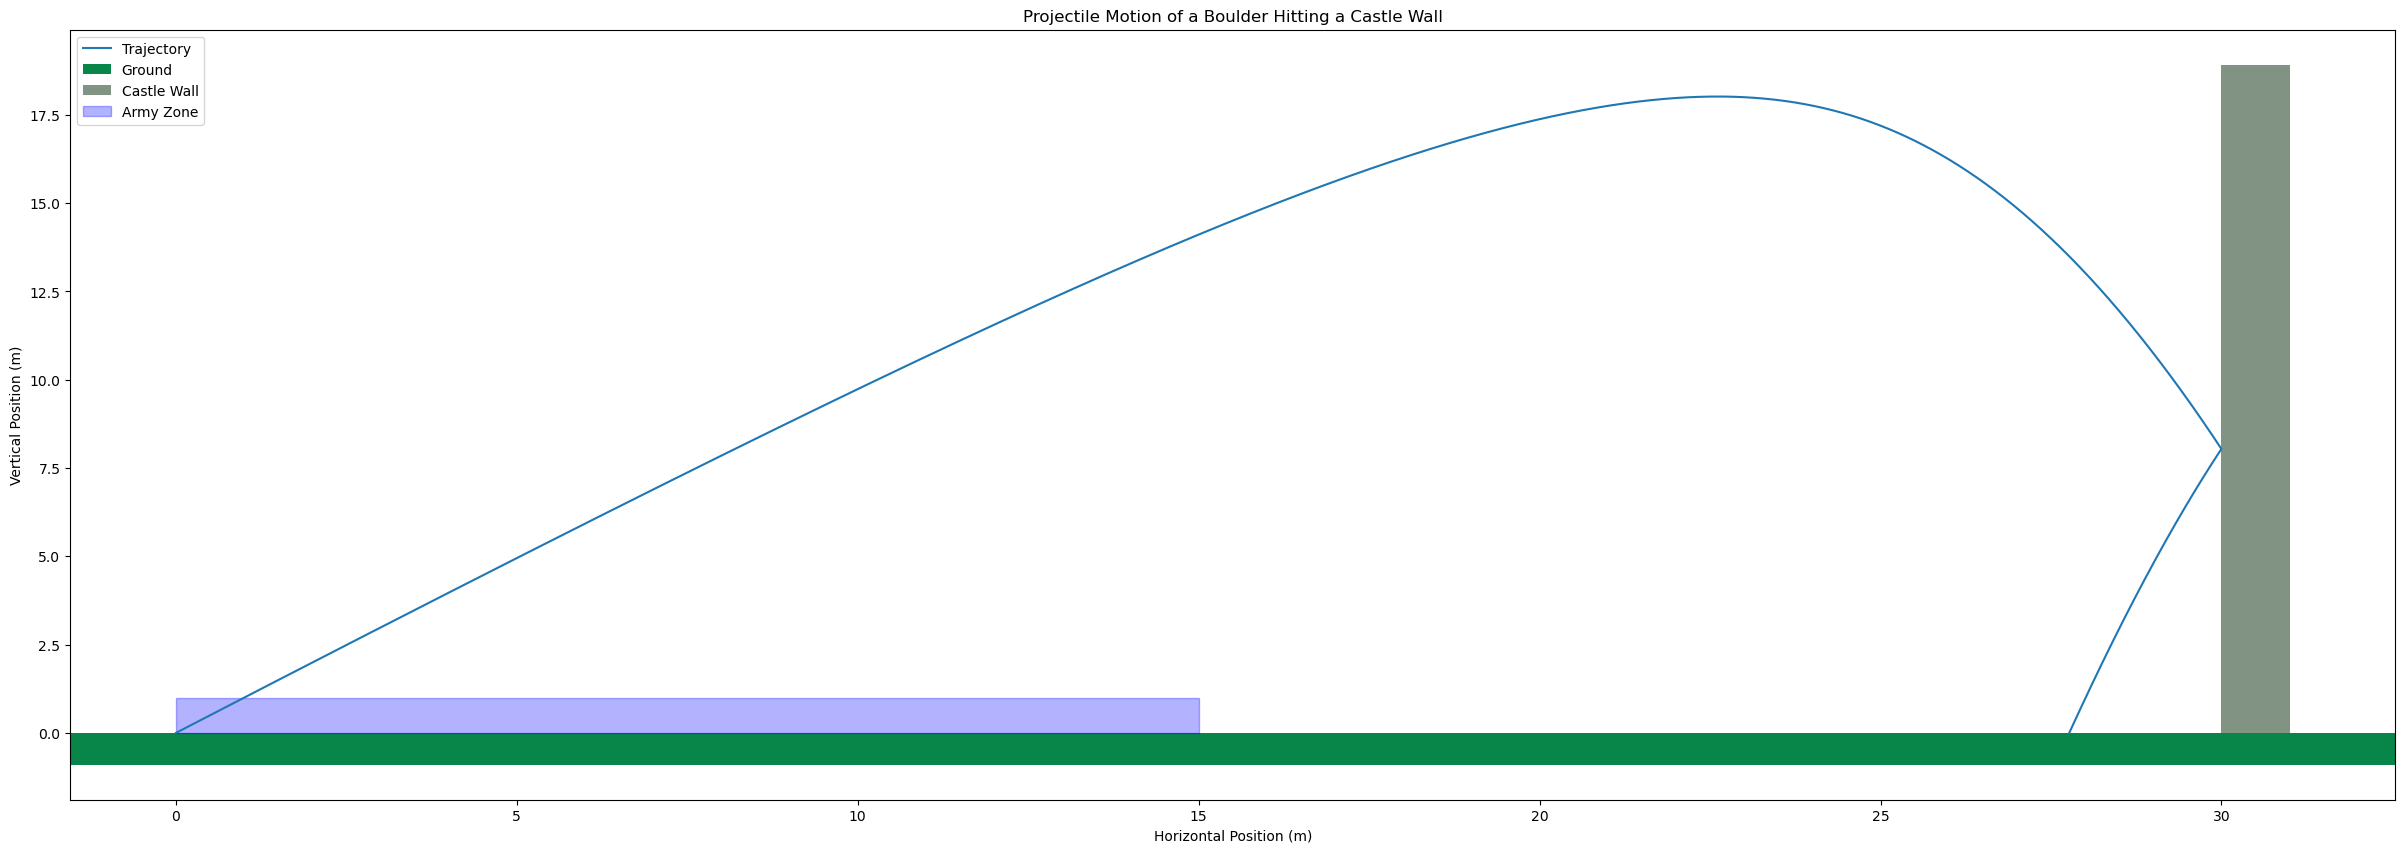

In [52]:
import matplotlib.pyplot as plt

### Variables ###

wall = 30     # wall position in meters

M_p = 10    # kg boulder
M_c = 2000   # kg counterweight
l = 1.0       # m
L = 10.0       # m
theta_d = 70  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 45  # Final angle of the counterweight below the horizontal in degrees
r=0.375    # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t = simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81)

if F is not None:
    shatter = F * r**2
    print(shatter)

plt.figure(figsize=(30,10))
plt.plot(x, y, label="Trajectory")

ymin, ymax = plt.ylim()  # get current y-axis limits

# Ground fill
plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")

# Wall fill
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")

# Army
plt.fill_between([0, 15], 0, 1, color='blue', alpha=0.3, label='Army Zone')

plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of a Boulder Hitting a Castle Wall")
plt.legend()
plt.show()

**Fig 5. The parameters for a sucessful launch cause the projectile to follow a parabolic curve. The wind resistance skews this arc. The rebounded curve can be seen.**

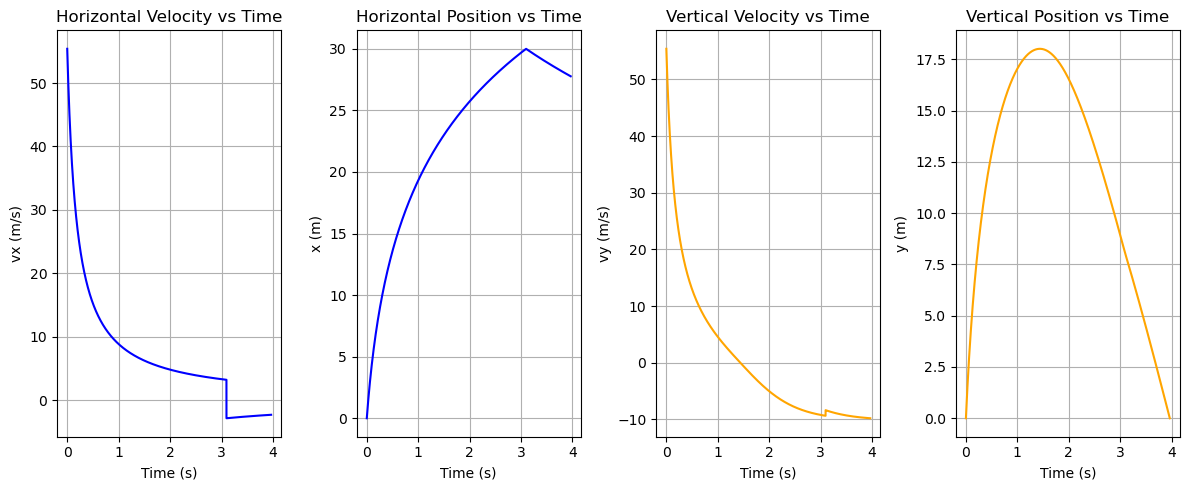

In [47]:
### Variables ###

wall = 30     # wall position in meters

M_p = 10    # kg boulder
M_c = 2000   # kg counterweight
l = 1.0       # m
L = 10.0       # m
theta_d = 70  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 45  # Final angle of the counterweight below the horizontal in degrees
r=0.375    # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t = simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 5))

ax1.plot(t, vx, color='blue')
ax1.set_title("Horizontal Velocity vs Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("vx (m/s)")
ax1.grid(True)

ax2.plot(t, x, color='blue')
ax2.set_title("Horizontal Position vs Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("x (m)")
ax2.grid(True)

ax3.plot(t, vy, color='orange')
ax3.set_title("Vertical Velocity vs Time")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("vy (m/s)")
ax3.grid(True)

ax4.plot(t, y, color='orange')
ax4.set_title("Vertical Position vs Time")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("y (m)")
ax4.grid(True)

plt.tight_layout()
plt.show()

**Fig 6. The horizontal and vertical velocity components both decrease exponentially. A slight moment after time = 3 s, the magnitude of the x velocity decreases, indicating the partially elastic collision with the wall. This can be verified by analyzing the plot ofHorizontal Position vs Time, which places the sharp turn at around two seconds. We can also see that there is minimal effect on the vertical velocity and position during the collision.**

## Quick Analysis of the Effect of Projectile Radius

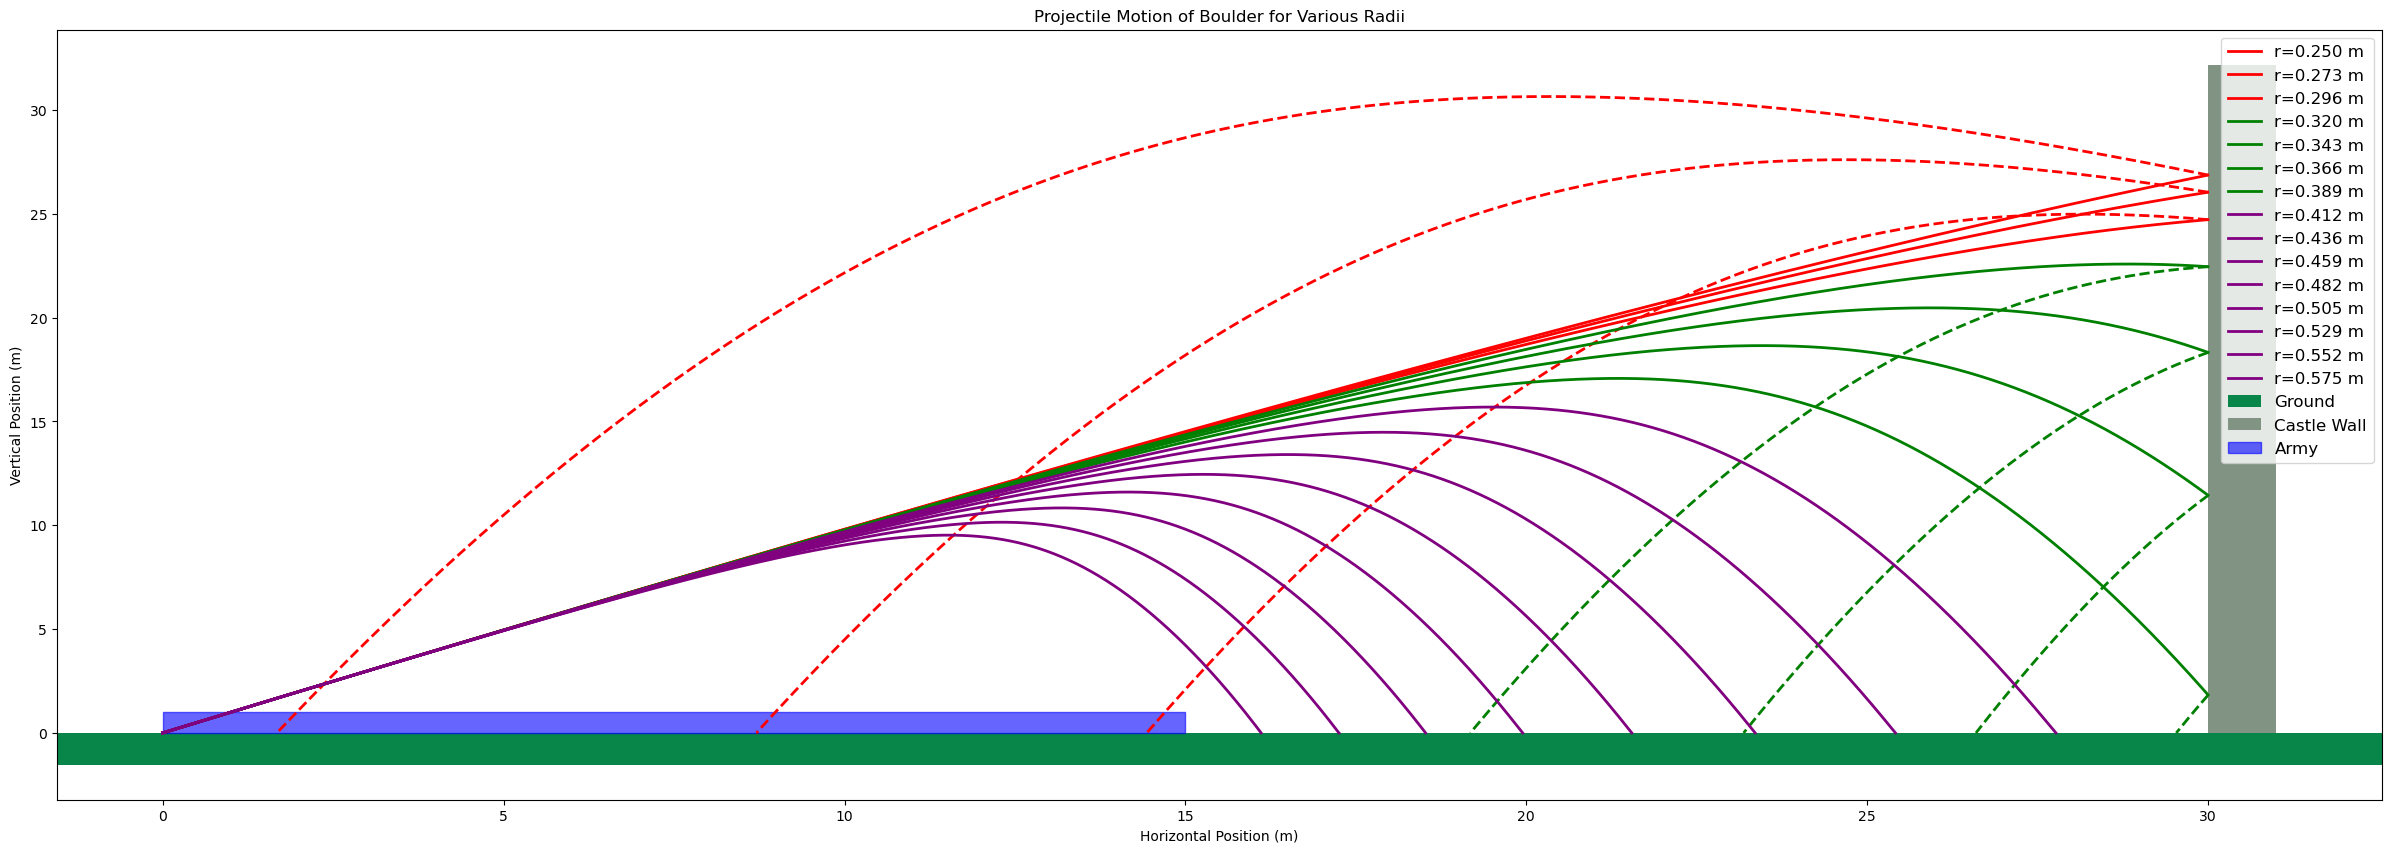

In [74]:
import matplotlib.pyplot as plt
import numpy as np

wall = 30     # wall position in meters

M_p = 10    # kg boulder
M_c = 2000   # kg counterweight
l = 1.0       # m
L = 10.0       # m
theta_d = 70  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 45  # Final angle of the counterweight below the horizontal in degrees
r_values = np.linspace(0.25, 0.575, 15)  # radius of the projectile m


plt.figure(figsize=(30,10))

for r in r_values:
    F, collision_type, x, y, dist, vx, vy, t = simulate_trial(
        M_p, M_c, l, L, theta_d, alpha_d, wall, r,
        dt=0.001, t_max=1000, g=9.81
    )

    # Determine color
    if 0.25 <= r <= 0.3:     ## hit army
        color = "red"
    elif 0.4 <= r: ## did not hit wall
        color = "purple"
    else:
        color = "green"      ## successful collision

    # Find index of collision
    hit_index = np.argmax(x >= wall) if np.any(x >= wall) else len(x)

    # Plot solid line before impact
    plt.plot(x[:hit_index], y[:hit_index], color=color, linestyle="-", linewidth=2, label=f"r={r:.3f} m")
    # Plot dotted line after rebound
    plt.plot(x[hit_index:], y[hit_index:], color=color, linestyle="--", linewidth=2)

# Ground + wall + rectangle
ymin, ymax = plt.ylim()
plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")
plt.fill_betweenx([0, 1], 0, 15, color="blue", alpha=0.6, label="Army")

plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of Boulder for Various Radii")

handles, labels = plt.gca().get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
plt.legend(*zip(*unique), loc="upper right", fontsize=12)

plt.show()

**Fig 7. The trajectories of the projectile for multiple projectile radii. The pre-collision trajectories are solid, and the trajecories after contact with the wall are dashed. Trials where the projectile failed to reach the wall are in purple. Trials where the projectile hit the wall, but rebounded and hit the army are in red. Successful trials - where the projectile both hit the wall and did not hit the army - are in green. Note that the parameter is quite sensitive, and slight changes in the projectile size have significant impacts on the success of a launch. Also note that - to avoid rebounds - it is critical that the projectile attains its apex before colliding with the wall. This provides a higher chance of the projectile deflection towards the ground. These trials provide a good range to sweep over when analyzing the phase space of projectile radius and mass.**

## Quick Analysis of the Effect of Projectile Mass

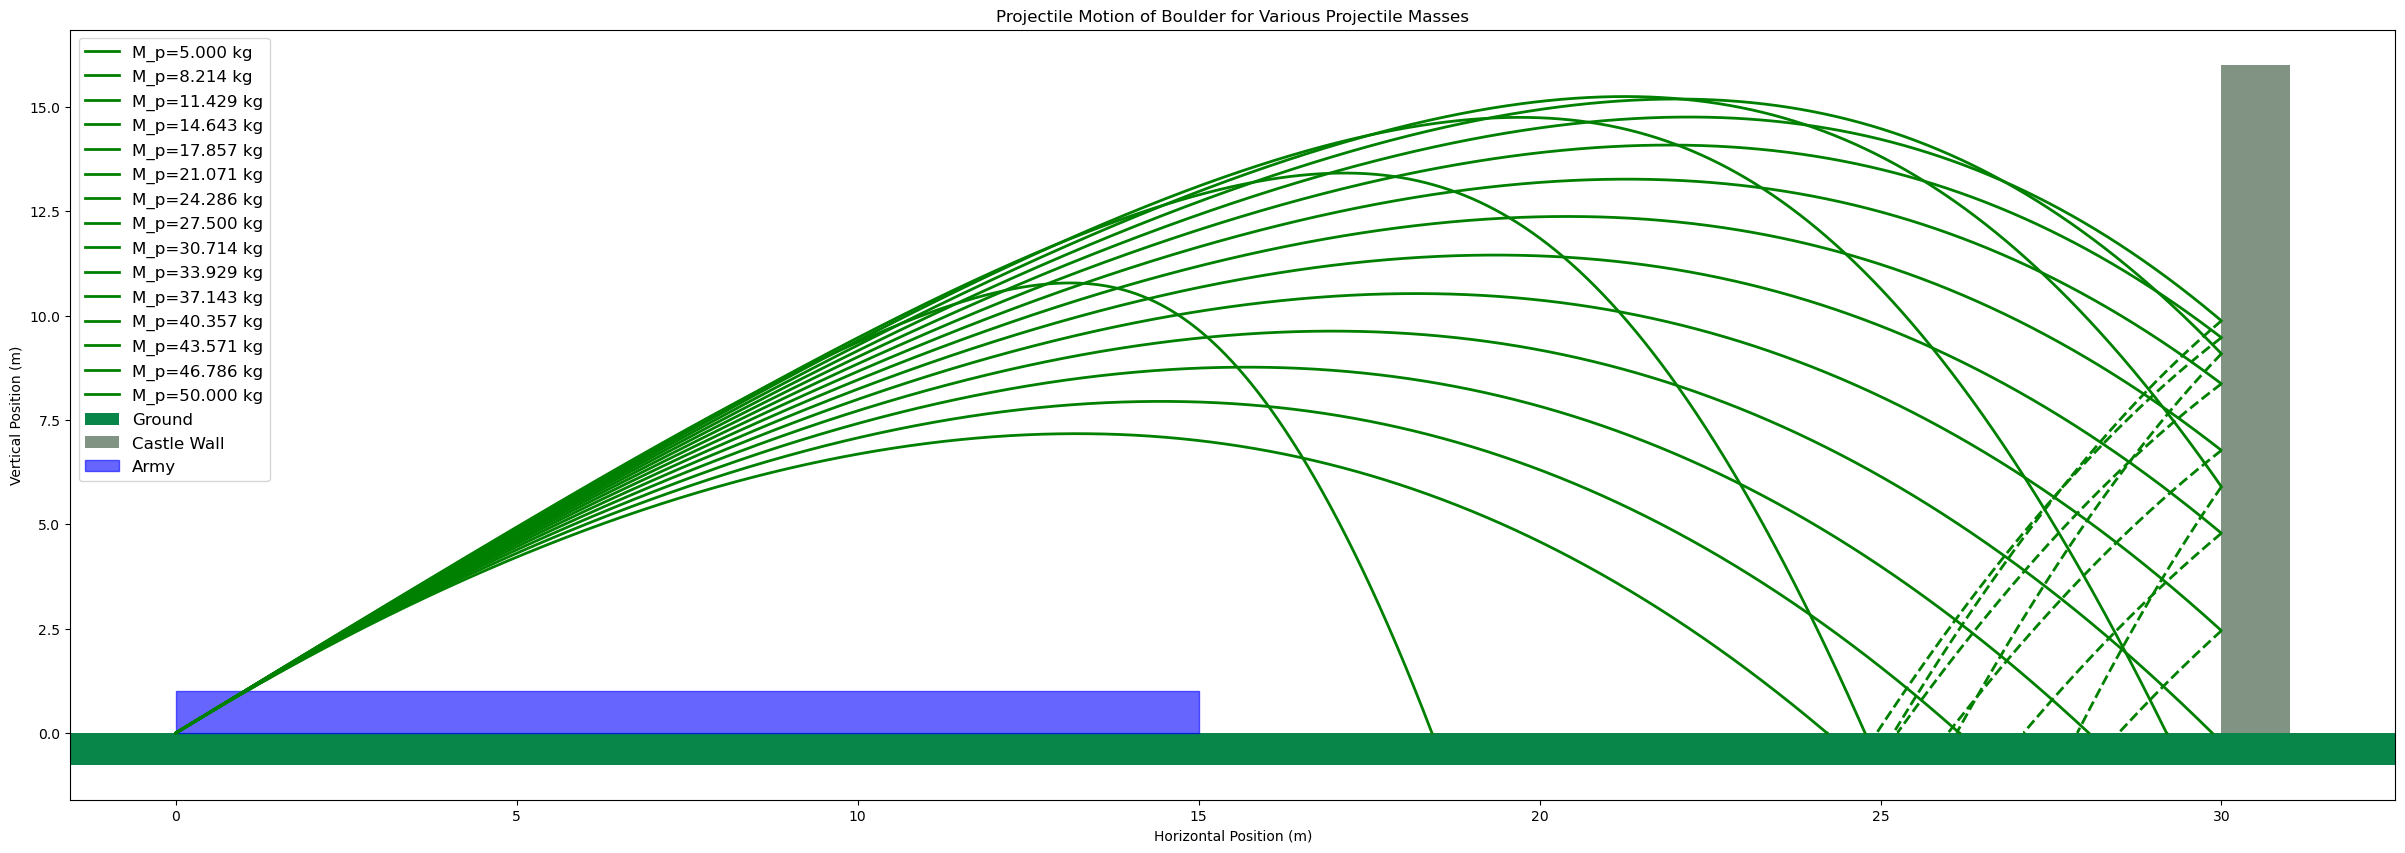

In [65]:
import matplotlib.pyplot as plt
import numpy as np

M_p_values = np.linspace(5,50,15)  
wall = 30
r = 0.375
M_c = 1000
l = 1.0
L = 10.0
theta_d = 70
alpha_d = 45

plt.figure(figsize=(30,10))

for M_p in M_p_values:
    F, collision_type, x, y, dist, vx, vy, t = simulate_trial(
        M_p, M_c, l, L, theta_d, alpha_d, wall, r,
        dt=0.001, t_max=1000, g=9.81
    )

    # Determine color
    if 0.25 <= M_p <= 0.3:     ## hit army
        color = "red"
    elif 0.425 <= M_p <= 0.45: ## did not hit wall
        color = "purple"
    else:
        color = "green"      ## successful collision

    # Find index of collision
    hit_index = np.argmax(x >= wall) if np.any(x >= wall) else len(x)

    # Plot solid line before impact
    plt.plot(x[:hit_index], y[:hit_index], color=color, linestyle="-", linewidth=2, label=f"M_p={M_p:.3f} kg")
    # Plot dotted line after rebound
    plt.plot(x[hit_index:], y[hit_index:], color=color, linestyle="--", linewidth=2)

# Ground + wall + rectangle
ymin, ymax = plt.ylim()
plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")
plt.fill_betweenx([0, 1], 0, 15, color="blue", alpha=0.6, label="Army")

plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of Boulder for Various Projectile Masses")

plt.legend(loc="upper left", fontsize=12)

plt.show()

**Fig 7. A sweep of projectile masses. Note that even under large difference in projectile mass, there is little effect on the location where the projectile hits the ground. Thus, I expect there to be little mass-dependence in the phase-space analysis.**

### What Projectile Parameters Optimize Force, Without Harming the Army?

In [82]:
# Constants
wall = 30
M_c = 1000
l = 1.0
L = 10.0
theta_d = 70
alpha_d = 45

# Sweep parameters
M_p_values = np.linspace(5,50,100)  
r_values = np.linspace(0.05, 0.45, 100)

# Storage for outcomes
results = np.zeros((len(r_values), len(M_p_values)))

# Sweep loop
for i, r in enumerate(r_values):
    for j, M_p in enumerate(M_p_values):
        F, collision_type, x, y, dist, vx, vy, t = simulate_trial(
            M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81
        )

        # Classification
        if np.max(x) < wall:
            outcome = 1  # failed to reach wall
        else:
            hit_index = np.argmax(x >= wall)
            if np.any(x[hit_index:] <= 15):
                outcome = 2  # rebounded, hit army
            else:
                outcome = 3  # successful wall hit

        results[i, j] = outcome

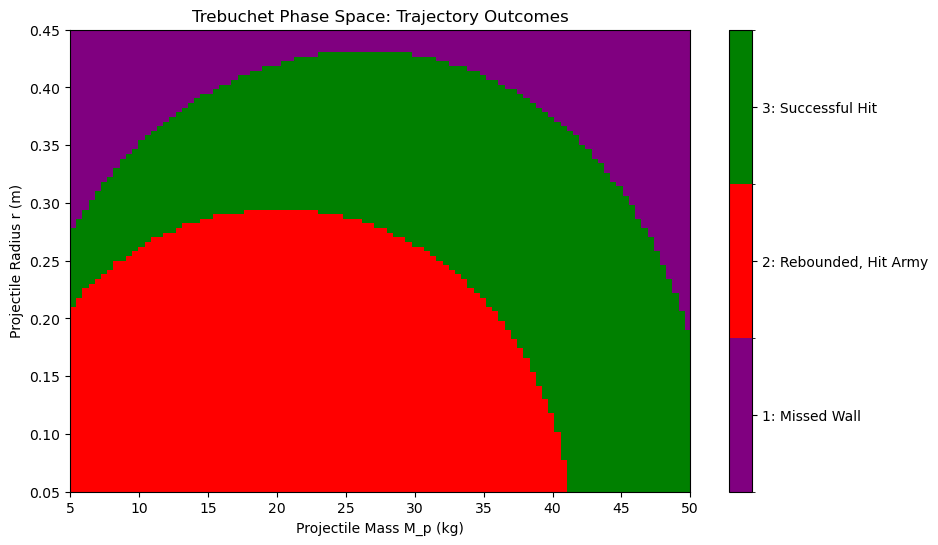

In [83]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define 3 discrete colors
colors = ["purple","red", "green"]
cmap = mcolors.ListedColormap(colors)

# Define normalization for discrete categories 1, 2, 3
norm = mcolors.BoundaryNorm([0.5, 1.5, 2.5, 3.5], cmap.N)

plt.figure(figsize=(10, 6))
plt.imshow(
    results,
    extent=[M_p_values.min(), M_p_values.max(), r_values.min(), r_values.max()],
    origin="lower",
    aspect="auto",
    cmap=cmap,
    norm=norm,
    interpolation="nearest"
)

# Colorbar and ticks
cbar = plt.colorbar(ticks=[1, 2, 3])
cbar.ax.set_yticklabels([
    "1: Missed Wall",
    "2: Rebounded, Hit Army",
    "3: Successful Hit"
])

plt.xlabel("Projectile Mass M_p (kg)")
plt.ylabel("Projectile Radius r (m)")
plt.title("Trebuchet Phase Space: Trajectory Outcomes")

plt.show()

**Fig 8. A phase-space analysis of Projectile Mass with respect to the Projectile Radius. Note that there appears to be a semi-circular region in which the projectile successfully impacts the wall. I will now analyze this green region to determine which parameters result in the highest impact force.**

In [84]:
# Define sweep ranges
M_p_values = np.linspace(5,50,100)  
r_values = np.linspace(0.05, 0.45, 100)

# Storage for results (impact force)
impact_forces = np.full((len(r_values), len(M_p_values)), np.nan)

# Fixed parameters
wall = 30
M_c = 1000
l = 1.0
L = 10.0
theta_d = 70
alpha_d = 45

for i, r in enumerate(r_values):
    for j, M_p in enumerate(M_p_values):
        F, collision_type, x, y, dist, vx, vy, t = simulate_trial(
            M_p, M_c, l, L, theta_d, alpha_d, wall, r,
            dt=0.001, t_max=1000, g=9.81
        )

        # Only count "successful" wall hits that don't rebound onto the army
        if collision_type == "wall" and F is not None:
            impact_forces[i, j] = F

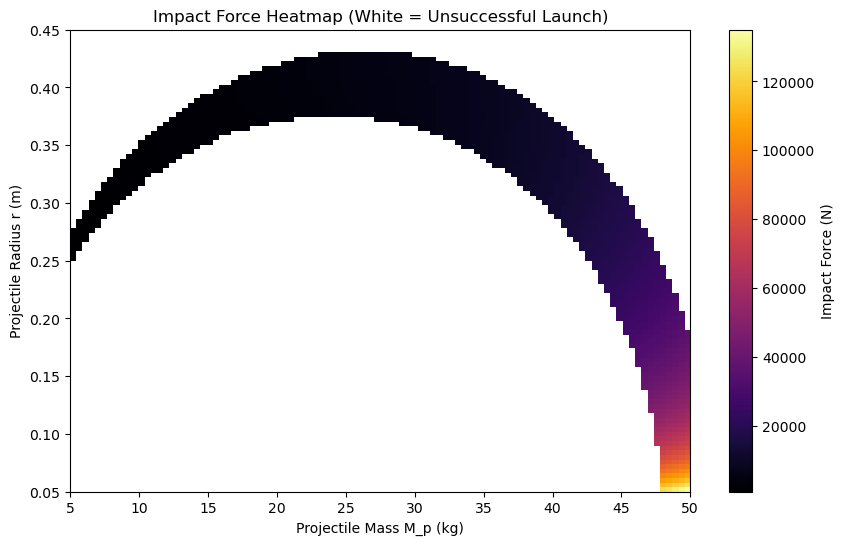

Max force = 135036.905
Occurs at r = 0.0500, M_p = 50.0000


In [85]:
# Mask out NaN values for plotting
masked = np.ma.masked_invalid(impact_forces)

# Create heatmap
plt.figure(figsize=(10, 6))
cmap = plt.colormaps.get_cmap("inferno").copy()
cmap.set_bad(color="white")  # unsuccessful trials appear white

# Display
plt.imshow(
    masked,
    extent=[M_p_values.min(), M_p_values.max(), r_values.min(), r_values.max()],
    origin="lower",
    aspect="auto",
    cmap=cmap,
    interpolation="nearest"
)

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Impact Force (N)")

plt.xlabel("Projectile Mass M_p (kg)")
plt.ylabel("Projectile Radius r (m)")
plt.title("Impact Force Heatmap (White = Unsuccessful Launch)")

plt.show()

# Find maximum force ignoring NaNs
max_force = np.nanmax(impact_forces)

# Get index of maximum force
max_index = np.unravel_index(np.nanargmax(impact_forces), impact_forces.shape)

# Extract corresponding r and M_p
best_r = r_values[max_index[0]]
best_M_p = M_p_values[max_index[1]]

print(f"Max force = {max_force:.3f}")
print(f"Occurs at r = {best_r:.4f}, M_p = {best_M_p:.4f}")

**Fig 9. A heat map demonstrating the impact force as a function of projectile radius and mass. All white regions were due to the fail cases of (1) not reaching the ground, (2) rebounding and hitting the army, or (3) the projectile shattering on impact. Note that the shape of the region does to directly match that of the green region in the phase-space diagram, which suggests that the subsect of the green region which is not represented on the heatmap, corresponds to parameters where the projectile shattered on impact. Also note that the impact force is maximized at a mass of 50.0000 kg and a radius of 0.0500 m, which corresponds to a maximum force of 135000 N.**

## Simulation of The Optimized Parameters

337.5922612890631


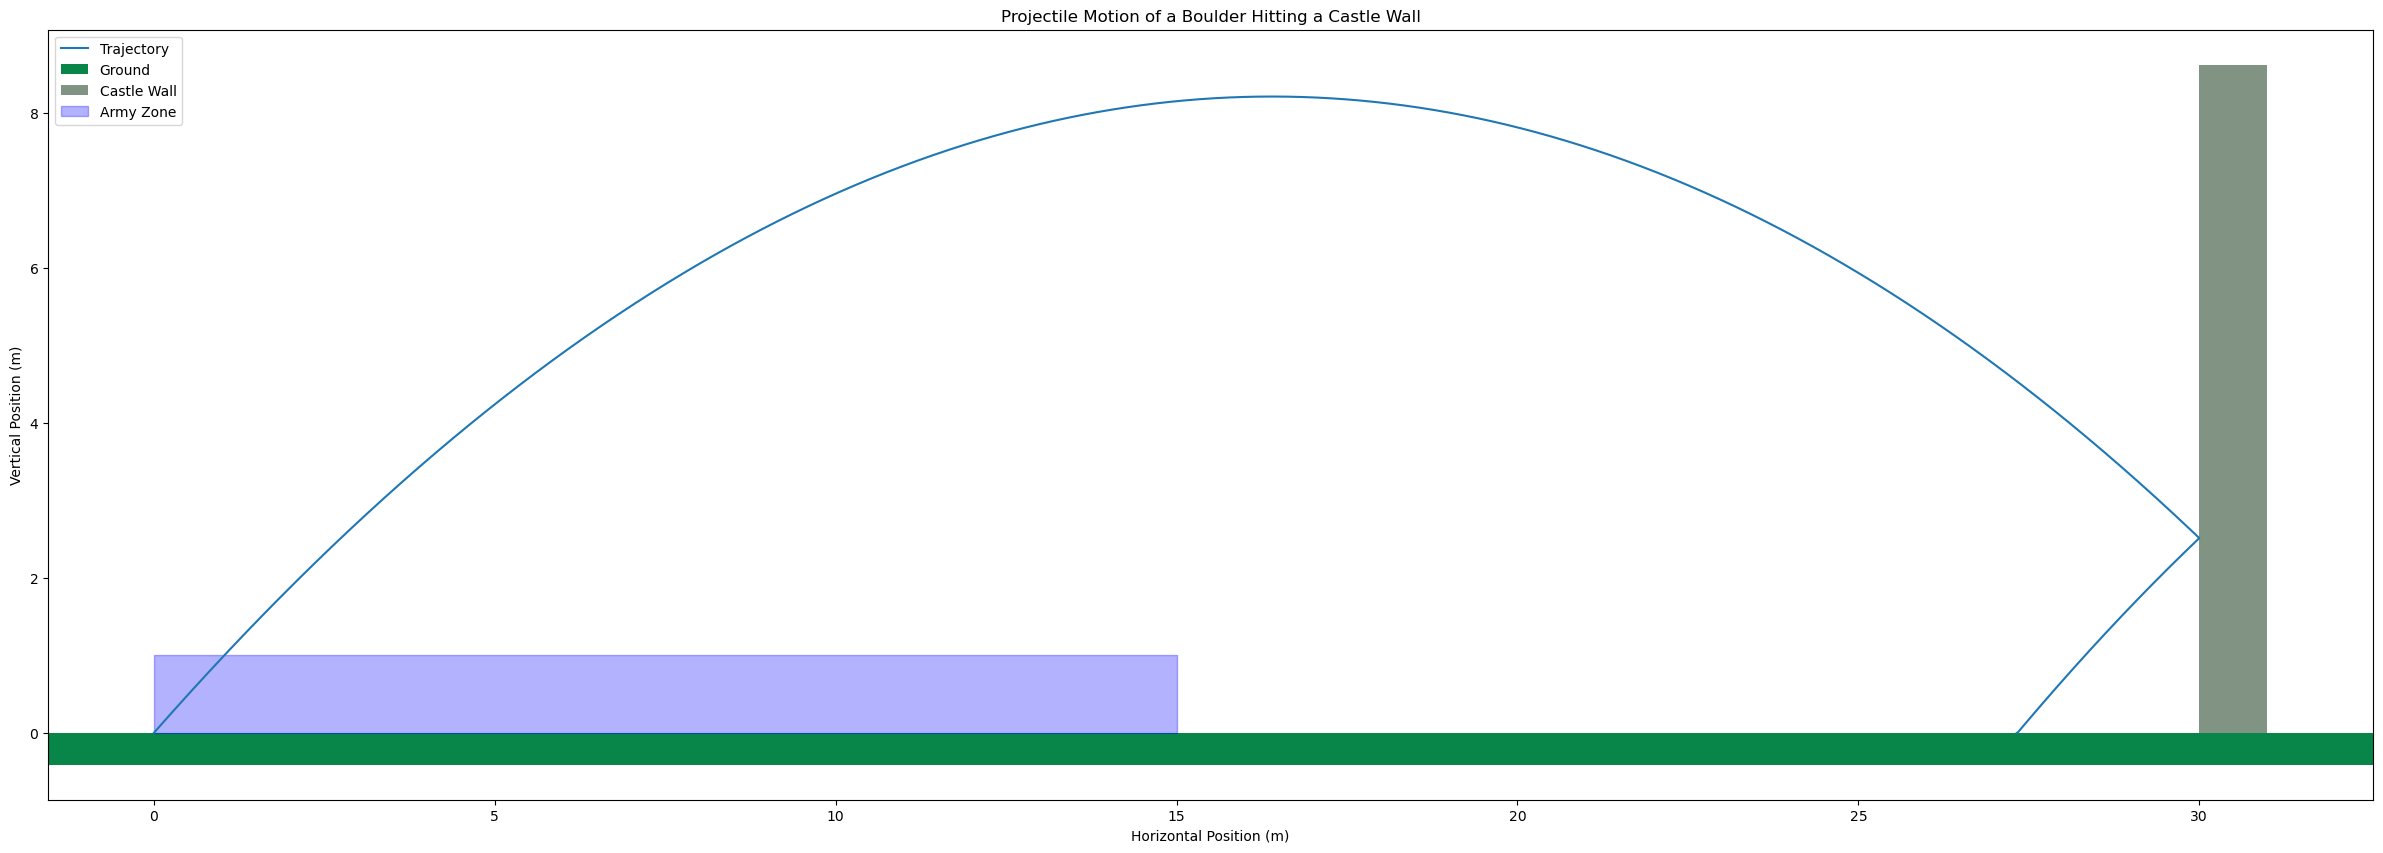

In [86]:
import matplotlib.pyplot as plt

### Variables ###

wall = 30     # wall position in meters

M_p = 50.0000    # kg boulder
M_c = 1000
l = 1.0
L = 10.0
theta_d = 70
alpha_d = 45
r=0.0500    # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t = simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81)

if F is not None:
    shatter = F * r**2
    print(shatter)

plt.figure(figsize=(30,10))
plt.plot(x, y, label="Trajectory")

ymin, ymax = plt.ylim()  # get current y-axis limits

# Ground fill
plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")

# Wall fill
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")

# Army
plt.fill_between([0, 15], 0, 1, color='blue', alpha=0.3, label='Army Zone')

plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of a Boulder Hitting a Castle Wall")
plt.legend()
plt.show()

**Fig 10. A simulation of the optimized parameters. Note that the trajectory follows a successful path, given the established restrictions.**

## Conclusion

**Research Question: *How can we optimize catapult parameters to maximize impact force?***

My set up:

There is a catapult which is built around a pivot. On this pivot, we place a rigid throwing arm. On one end we place our projectile. On the other end, opposite the pivot with respect to the projectile, we place the counterweight. It will be the falling of this counterweight which provides the kinetic energy required to launch the projectile. 

I am assuming that the catapult has been built by some magical engineer, such that there is no friction between the arm and the frame, at the pivot point. 

I am also assuming the arm is perfectly strong, and will not deform or break under the stresses. 

To simplify the math, I am assuming a massless throwing arm. 

Through my research, it became clear that the strength of a castle wall is dependent on many factors, such as stone type, architecture, and impact angle. Thus, for this simulation, I have elected to assume the wall will not break or deform, regardless of the impact force. 

The reasoning for this decision is twofold. 

For one, it would be very difficult to find to construct an estimate for the strength of the wall (*for the reasons above*) and there is little research regarding the critical impulse to collapse a castle wall. Much of the research I can find where people are modeling the strength of castle walls is focused on restoration, not destruction.

Secondly, if I was a medieval military leader testing catapult designs, I would care less about a catapults' ability to destroy a specific wall. It would be more prudent to design a catapult that maximizes the force delivered given a distance to a target.

I then imagined that the warlord which controls the catapult has set up his army such that they are 15 meters away from the wall, with the wall 30 meters from the catapult. Below, I have included a diagram showing the position of the army, and a fail case where the projectile has hit the army. 

I wanted to find which set of projectile radius and mass would optimize the impact force, without colliding with an army, or having the projectile shatter on impact. 

I found that the was a semi-circular region where the collisions were successful, and within that region, **a projectile radius of 0.05 m and mass of 50 kg optimized the impact force.**

**Limitations** 

There were many assumptions I made when writing the physics for the catapult. 

I assumed that there was no friction and that there was a perfect energy transfer with 100% efficiency. I assumed there were no stresses on the throwing arm. In reality, it would be extremely difficult to design a 100 meter arm that could hold a 10000 kilogram counterweight, let alone an arm whose mass was negligible.

I also made some assumptions to reduce the number of variables at play in the flight and collision. 

I assumed a regular deformation during the impact with the wall. 


All of these assumptions means the simulation deviates from reality by quite a bit.

**Next Steps**

The most obvious next step will be to get rid of some of these assumptions and more accurately model the situation.

## Acknowledgements

Generative AI was used in this project to help troubleshoot my code when simulations were not running as expected (non-parabolic trajectories, negative x-velocities, etc). I also used Gen AI by asking it to confirm that the code I had written actually matched the physics that I had written down. Finally, Gen AI was used to add the ground and wall in the example simulation, and implement the colourbar and extent code within the heat maps.

[1] For the projectile strength, I referenced a study from university of Colorado. It can be found through the link https://ceae.colorado.edu/~amadei/CVEN5768/PDF/NOTES8.pdf

[2] For the drag coefficient of the rock, I referenced a study by S. Stojadinović, from the International Journal of Rock Mechanics and Mining Sciences. It can be found through the link https://www.sciencedirect.com/science/article/pii/S1365160913000786.

## Appendix: Code validation

### A1.1: Comparison of simulation results with by-hand calculations

With reference to my example simulation (below).

**Start by computing kinetic energy**

$$h_{C,i}=l\sin(\theta)\quad\text{and}\quad h_{C,f}=-l\sin(\alpha)$$
Thus,
$$h_{C,i}=(1)\sin(70^\circ)\quad\text{and}\quad h_{C,f}=-(1)\sin(60^\circ)$$

$$h_{C,i}=0.940m\quad\text{and}\quad h_{C,f}=-0.866m$$

For the projectile, we can do the reverse and show the following. Note the sign change, as the projectile is opposite the counterweight.

$$h_{P,i}=-L\sin(\theta)\quad\text{and}\quad h_{P,f}=L\sin(\alpha)$$
Thus
$$h_{P,i}=-(10)\sin(70^\circ)\quad\text{and}\quad h_{P,f}=(10)\sin(60^\circ)$$

$$h_{P,i}=-9.4m\quad\text{and}\quad h_{P,f}=8.66m$$

Now for the potential energies of each state.

$$U_{net,i}=m_Cgh_{C,i}+m_Pgh_{P,i}=m_Cgl\sin(\theta)-m_PgL\sin(\theta)=4149.63J$$

$$U_{net,f}=m_Cgh_{C,f}+m_Pgh_{P,f}=-m_Cgl\sin(\alpha)+m_PgL\sin(\alpha)=-3822.96J$$

$$\Delta U_{net}=U_{net,f}-U_{net,i}=-3822.96J-4149.63J=-7972.587J$$

And thus the kinetic energy of the projectile at the time of launch is 7972.587J. Is this is very similar to the result from the simulation. The slight deviation may be due to differences in rounding.

0.0
7971.342219465796


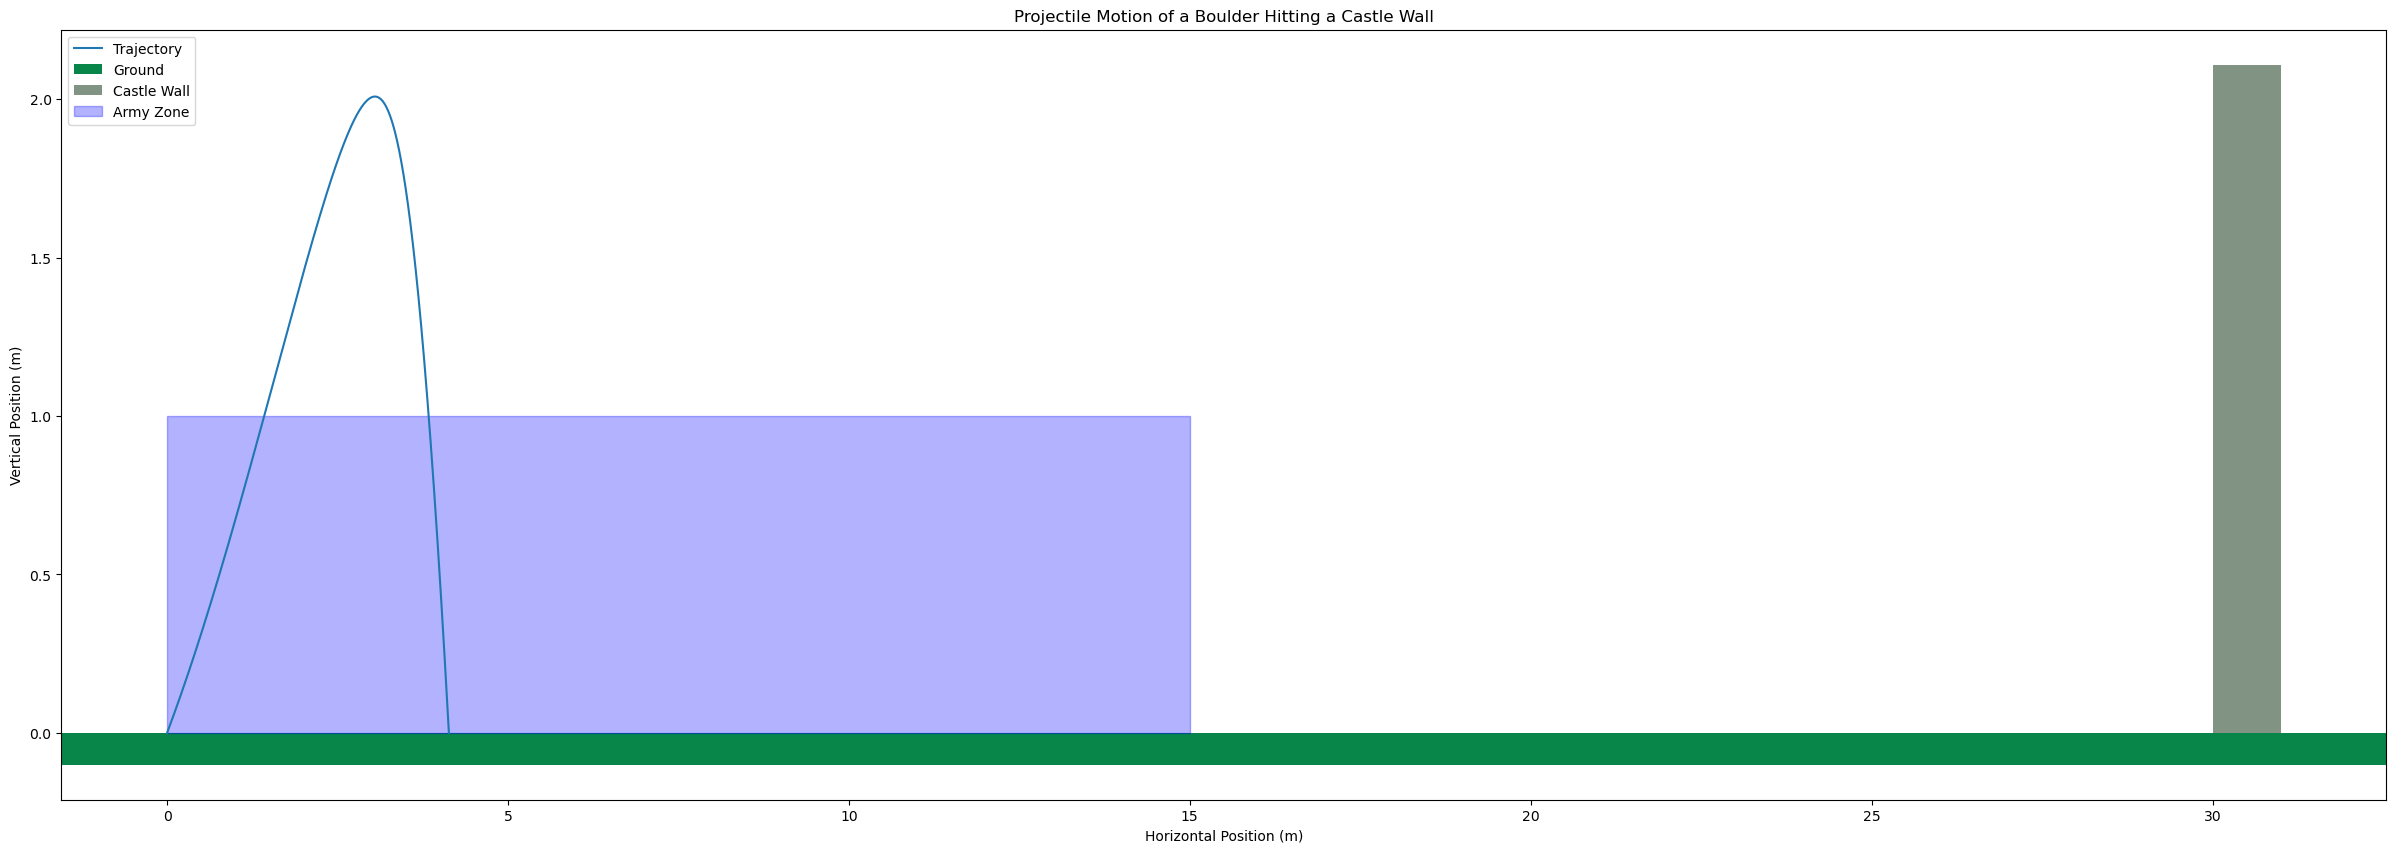

In [64]:
import matplotlib.pyplot as plt

### Variables ###

wall = 30     # wall position in meters

M_p = 10.0    # kg boulder
M_c = 550.0   # kg counterweight
l = 1.0       # m
L = 10.0      # m
theta_d = 70  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 60  # Final angle of the counterweight below the horizontal in degrees
r=1           # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t= simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81,)

print(y[-1])

alpha = np.deg2rad(alpha_d)
theta = np.deg2rad(theta_d)

print(delta_k(theta, alpha, l, L, M_c, M_p, g=9.81))

plt.figure(figsize=(30,10))
plt.plot(x, y, label="Trajectory")
ymin, ymax = plt.ylim()  # get current y-axis limits

plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")  # solid fill below y=0
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")
plt.fill_between([0, 15], 0, 1, color='blue', alpha=0.3, label='Army Zone')
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of a Boulder Hitting a Castle Wall")
plt.legend()

### A1.2: 

My second idea to validate the code was to set up a situation where there should be no increase in kinetic energy. Setting up the catapult so that it is balanced like a see-saw, I am hoping to see $\Delta K$ be zero (the function call should output None) and have no trajectory plotted.

No plot was plotted, which was what I expected!

None


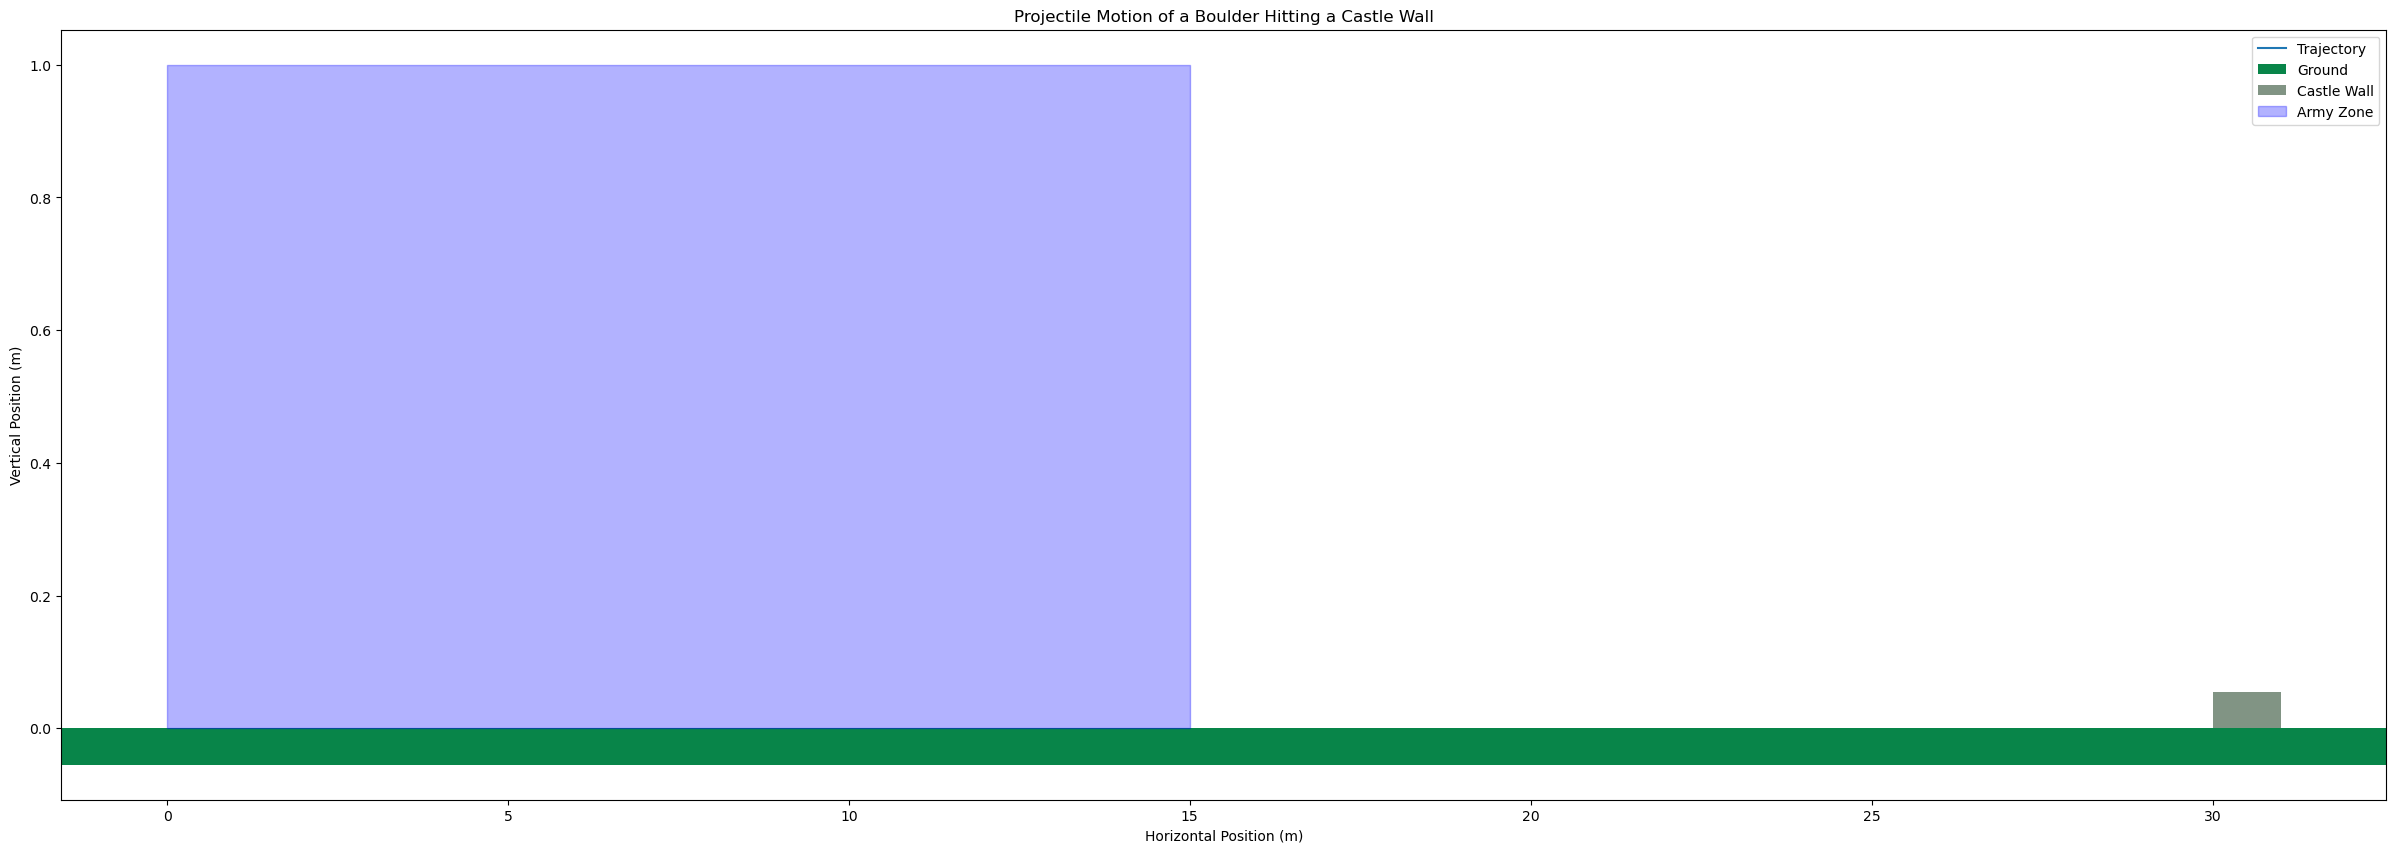

In [87]:
import matplotlib.pyplot as plt

### Variables ###

wall = 30     # wall position in meters

M_p = 10.0    # kg boulder
M_c = 10.0   # kg counterweight
l = 10.0       # m
L = 10.0       # m
theta_d = 0  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 60  # Final angle of the counterweight below the horizontal in degrees
r=1           # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t= simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81)

alpha = np.deg2rad(alpha_d)
theta = np.deg2rad(theta_d)

print(delta_k(theta, alpha, l, L, M_c, M_p, g=9.81))

plt.figure(figsize=(30,10))
plt.plot(x, y, label="Trajectory")
ymin, ymax = plt.ylim()  # get current y-axis limits

plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")  # solid fill below y=0
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")
plt.fill_between([0, 15], 0, 1, color='blue', alpha=0.3, label='Army Zone')
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of a Boulder Hitting a Castle Wall")
plt.legend()

### A1.3: 

My next code validation test to assure that no force is calculated if the projectile hits the groud before hitting the wall. By just moving the wall back, we can see that the output is None!

30694.6940533646
None


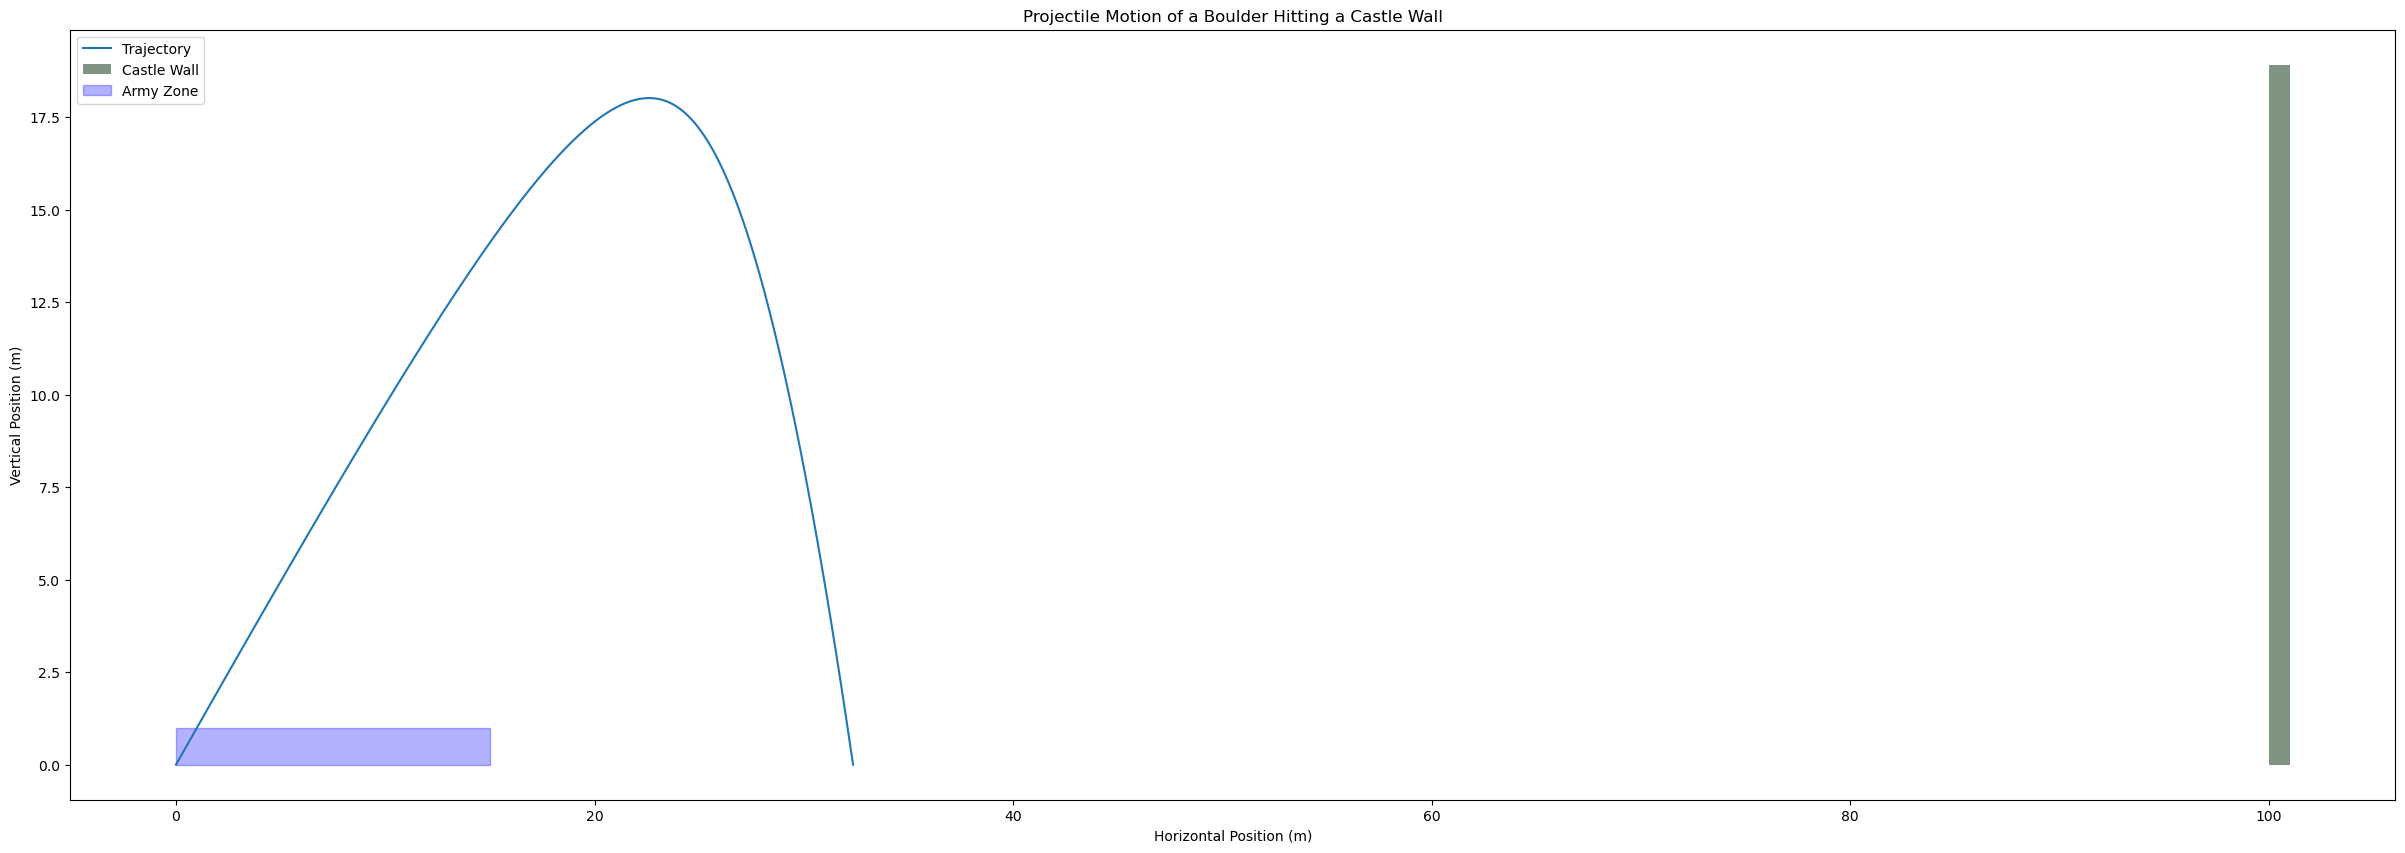

In [89]:
import matplotlib.pyplot as plt

### Variables ###

wall = 100     # wall position in meters

M_p = 10    # kg boulder
M_c = 2000   # kg counterweight
l = 1.0       # m
L = 10.0       # m
theta_d = 70  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 45  # Final angle of the counterweight below the horizontal in degrees
r=0.375    # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t = simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81)

alpha = np.deg2rad(alpha_d)
theta = np.deg2rad(theta_d)

print(delta_k(theta, alpha, l, L, M_c, M_p, g=9.81))

print(F)

plt.figure(figsize=(30,10))
plt.plot(x, y, label="Trajectory")
ymin, ymax = plt.ylim()  # get current y-axis limits



plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")
plt.fill_between([0, 15], 0, 1, color='blue', alpha=0.3, label='Army Zone')
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of a Boulder Hitting a Castle Wall")
plt.legend()

My final code validation is for a simulation where the projectile impacts the wall, but falls into the army. The force should be returned as None, which it is!

None
321486.53245366085


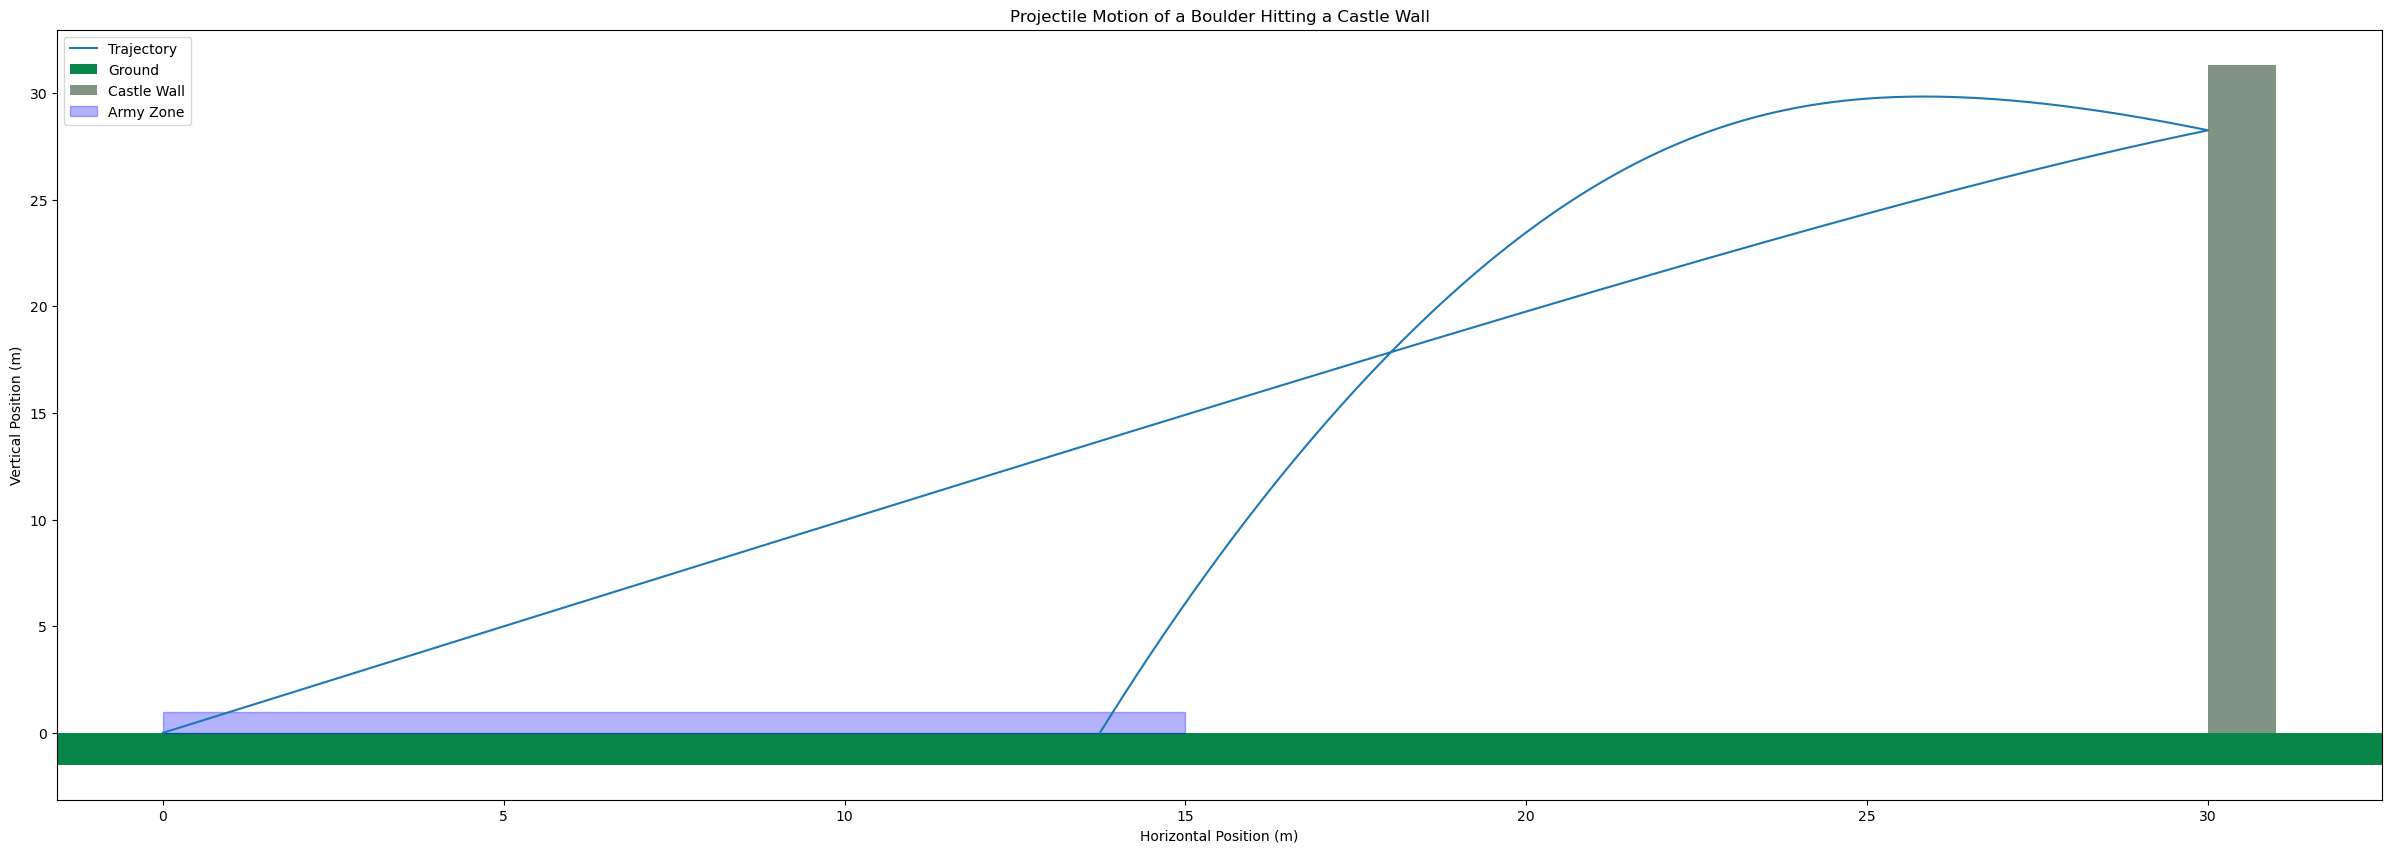

In [91]:
wall = 30     # wall position in meters

M_p = 10    # kg boulder
M_c = 20000   # kg counterweight
l = 1.0       # m
L = 10.0       # m
theta_d = 70  # Initial angle of the counterweight above the horizontal in degrees
alpha_d = 45  # Final angle of the counterweight below the horizontal in degrees
r=0.375    # radius of the projectile m

F, collision_type, x, y, dist, vx, vy, t= simulate_trial(M_p, M_c, l, L, theta_d, alpha_d, wall, r, dt=0.001, t_max=1000, g=9.81)

print(F)

alpha = np.deg2rad(alpha_d)
theta = np.deg2rad(theta_d)

print(delta_k(theta, alpha, l, L, M_c, M_p, g=9.81))

plt.figure(figsize=(30,10))
plt.plot(x, y, label="Trajectory")
ymin, ymax = plt.ylim()  # get current y-axis limits

plt.axhspan(ymin, 0, facecolor="#088549", alpha=1.0, label="Ground")  # solid fill below y=0
plt.fill_betweenx([0, ymax], wall, wall+1, facecolor="#819484", label="Castle Wall")
plt.fill_between([0, 15], 0, 1, color='blue', alpha=0.3, label='Army Zone')
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Projectile Motion of a Boulder Hitting a Castle Wall")
plt.legend()